## Classification

In [2]:
import pandas as pd

df = pd.read_excel("all_merged_final_updated.xlsx")  
drought_years = [2007, 2008, 2010, 2014, 2018, 2021]
df["drought"] = df["yil"].apply(lambda x: 1 if x in drought_years else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13807 entries, 0 to 13806
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   istasyon_no                    13807 non-null  int64         
 1   istasyon_adi                   13807 non-null  object        
 2   yil                            13807 non-null  int64         
 3   ay                             13807 non-null  int64         
 4   hafta                          13807 non-null  int64         
 5   tarih                          13807 non-null  datetime64[ns]
 6   hafta_baslangic                13807 non-null  object        
 7   ortalama_toprak_sicakligi_5    13807 non-null  float64       
 8   ortalama_toprak_sicakligi_10   13807 non-null  float64       
 9   ortalama_toprak_sicakligi_20   13807 non-null  float64       
 10  ortalama_toprak_sicakligi_50   13807 non-null  float64       
 11  ortalama_toprak

In [3]:
istasyon_mapping = df[["istasyon_no", "istasyon_adi"]].drop_duplicates()
istasyon_dict = dict(istasyon_mapping.values)
istasyon_dict

{17191: 'cihanbeyli',
 17239: 'aksehir',
 17242: 'beysehir',
 17248: 'eregli',
 17754: 'kulu',
 17798: 'yunak',
 17832: 'ilgin',
 17898: 'seydisehir',
 17900: 'cumra',
 17902: 'karapinar',
 18486: 'ahirli',
 18487: 'akoren',
 18488: 'altinekin',
 18489: 'bozkir',
 18490: 'celtik',
 18491: 'derbent',
 18492: 'derebucak',
 18493: 'doganhisar',
 18494: 'emirgazi',
 18495: 'guneysinir',
 18497: 'huyuk',
 18498: 'taskent',
 18499: 'tuzlukcu',
 18500: 'yalihuyuk',
 19321: 'kadinhani',
 19322: 'sarayonu'}

---
---
## Flattened data model

In [4]:
import pandas as pd
import numpy as np


critical_weeks = df[df["hafta"].between(21, 24)]
signal_vars = ["gdd", "toplam_yagis_mm_mod", 
    "GLNM", "TCI", "VCI", "VHI", "NDVI",
    "ortalama_toprak_sicakligi_5", "ortalama_toprak_sicakligi_10", 
    "ortalama_toprak_sicakligi_20", "ortalama_toprak_sicakligi_50",
    "ortalama_toprak_nemi_20", "LST_Day_1km", 
    "ortalama_sicaklik", "spi_3", "spi_6"
]
available_signals = [col for col in signal_vars if col in critical_weeks.columns]

def compute_trend(x):
    if len(x.dropna()) < 2:
        return np.nan
    return np.polyfit(range(len(x)), x.fillna(method='ffill'), 1)[0]

features_station = {}
grouped = critical_weeks.groupby(["yil", "istasyon_no"])

for var in available_signals:
    features_station[f"{var}_mean"] = grouped[var].mean()
    features_station[f"{var}_std"] = grouped[var].std()
    features_station[f"{var}_min"] = grouped[var].min()
    features_station[f"{var}_max"] = grouped[var].max()
    features_station[f"{var}_trend"] = grouped[var].apply(compute_trend)

X_summary_station = pd.DataFrame(features_station)
X_summary_station = X_summary_station.fillna(X_summary_station.mean())
X_summary_station["drought"] = df.groupby(["yil", "istasyon_no"])["drought"].mean()
X_summary_station["yield"] = df.groupby(["yil", "istasyon_no"])["verim"].mean()
X_summary_station

/var/folders/t6/8rz0bgqn1737cjj20jz1d5cm0000gn/T/ipykernel_20826/3332091335.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return np.polyfit(range(len(x)), x.fillna(method='ffill'), 1)[0]


gdd_mean   gdd_std    gdd_min    gdd_max  gdd_trend  \
yil  istasyon_no                                                         
2007 17191        15.467857  1.202852  14.157143  16.757143   0.155714   
     17239        14.721429  1.026088  13.757143  15.671429   0.360000   
     17242        12.864286  1.420477  10.857143  14.157143   0.945714   
     17248        15.739286  0.884590  14.514286  16.442857   0.512857   
     17754        14.521429  1.382421  12.771429  15.671429   0.202857   
...                     ...       ...        ...        ...        ...   
2021 18498        10.028571  1.509471   7.942857  11.528571  -0.160000   
     18499        11.032143  1.655926   8.785714  12.771429  -0.172857   
     18500        12.900000  1.540077  10.800000  14.485714  -0.128571   
     19321        11.717857  2.147531   8.985714  14.214286  -0.475714   
     19322        11.378571  1.819714   8.828571  13.142857  -0.131429   

                  toplam_yagis_mm_mod_mean  toplam_yagis_mm_mod_std  \
yil  istasyon_no                                                      
2007 17191                           4.151                 4.688639   
     17239                           5.671                 3.860553   
     17242                           5.016                 1.860206   
     17248                           3.036                 1.075097   
     17754                           3.081                 1.036147   
...                                    ...                      ...   
2021 18498                           5.401                 4.584757   
     18499                          16.501                 7.738648   
     18500                           4.051                 3.126766   
     19321                          17.951                15.619112   
     19322                          15.051                14.013446   

                  toplam_yagis_mm_mod_min  toplam_yagis_mm_mod_max  \
yil  istasyon_no                                                     
2007 17191                          0.001                    8.601   
     17239                          0.201                    9.281   
     17242                          2.421                    6.461   
     17248                          2.081                    4.441   
     17754                          1.901                    4.421   
...                                   ...                      ...   
2021 18498                          0.001                   10.901   
     18499                          7.701                   23.201   
     18500                          0.001                    7.101   
     19321                          2.001                   37.601   
     19322                          2.801                   30.301   

                  toplam_yagis_mm_mod_trend  ...  spi_3_min  spi_3_max  \
yil  istasyon_no                             ...                         
2007 17191                            3.300  ...  -1.476216  -0.983321   
     17239                           -1.628  ...   0.215278   1.262361   
     17242                            0.002  ...   1.370405   1.421322   
     17248                           -0.514  ...   1.243769   2.026038   
     17754                           -0.168  ...   1.311234   2.064491   
...                                     ...  ...        ...        ...   
2021 18498                            1.900  ...  -0.501515   0.451954   
     18499                            1.340  ...  -0.631231   0.177921   
     18500                            1.120  ...  -1.227415   0.012648   
     19321                            8.980  ...  -0.336127   0.383852   
     19322                            8.920  ...  -0.935182  -0.042155   

                  spi_3_trend  spi_6_mean  spi_6_std  spi_6_min  spi_6_max  \
yil  istasyon_no                                                             
2007 17191          -0.043158    0.019604   0.168560  -0.170604   0.201899   
     17239          -0.2

In [5]:
X_summary_station.to_excel("X_summary_station.xlsx", index=True)

In [6]:
train_years = list(range(2007, 2018))  
test_years = list(range(2018, 2022))  

critical_weeks_train = df[(df["hafta"].between(21, 24)) & (df["yil"].isin(train_years))]
critical_weeks_test = df[(df["hafta"].between(21, 24)) & (df["yil"].isin(test_years))]

def summarize_weeks(df_subset):
    grouped = df_subset.groupby(["yil", "istasyon_no"])
    features = {}
    for var in available_signals:
        features[f"{var}_mean"] = grouped[var].mean()
        features[f"{var}_std"] = grouped[var].std()
        features[f"{var}_min"] = grouped[var].min()
        features[f"{var}_max"] = grouped[var].max()
        features[f"{var}_trend"] = grouped[var].apply(compute_trend)
    df_features = pd.DataFrame(features)
    df_features["drought"] = df_subset.groupby(["yil", "istasyon_no"])["drought"].mean()
    return df_features.fillna(df_features.mean())

X_train = summarize_weeks(critical_weeks_train)
X_test = summarize_weeks(critical_weeks_test)

y_train = X_train.pop("drought")
y_test = X_test.pop("drought")

/var/folders/t6/8rz0bgqn1737cjj20jz1d5cm0000gn/T/ipykernel_20826/3332091335.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return np.polyfit(range(len(x)), x.fillna(method='ffill'), 1)[0]
/var/folders/t6/8rz0bgqn1737cjj20jz1d5cm0000gn/T/ipykernel_20826/3332091335.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return np.polyfit(range(len(x)), x.fillna(method='ffill'), 1)[0]


In [7]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

drought
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

---
## CatBoost Model

**We first split the data into training (2007–2017) and testing (2018–2021) sets based on year.**

- Then, we filtered weekly observations for selected time windows (e.g., weeks 21–24).
- Finally, we flattened the weekly data by computing yearly station-level summary statistics like mean, std, min, max, and trend.

In [14]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# ============================================
# FEATURE ENGINEERING - YEAR AGGREGATION
# ============================================
def create_summary_features(df, week_range, signal_vars):
    """
    Create summary statistics (mean, std, min, max, trend) for each year-station
    """
    # Filter weeks
    df_filtered = df[df["hafta"].between(*week_range)].copy()
    
    # Ensure drought column
    drought_years = [2007, 2008, 2010, 2014, 2018, 2021]
    if 'drought' not in df_filtered.columns:
        df_filtered['drought'] = df_filtered['yil'].apply(lambda x: 1 if x in drought_years else 0)
    
    # Filter available variables (EXCLUDE LST)
    available_vars = [v for v in signal_vars if v in df_filtered.columns and 'lst' not in v.lower()]
    
    print(f"Using {len(available_vars)} signal variables (LST excluded)")
    print(f"Variables: {', '.join(available_vars[:10])}...")
    
    # Group by year and station
    grouped = df_filtered.groupby(['yil', 'istasyon_no'])
    
    # Create summary features
    features = {}
    
    def compute_trend(x):
        x_clean = x.dropna()
        if len(x_clean) < 2:
            return np.nan
        return np.polyfit(range(len(x_clean)), x_clean, 1)[0]
    
    for var in available_vars:
        features[f'{var}_mean'] = grouped[var].mean()
        features[f'{var}_std'] = grouped[var].std()
        features[f'{var}_min'] = grouped[var].min()
        features[f'{var}_max'] = grouped[var].max()
        features[f'{var}_trend'] = grouped[var].apply(compute_trend)
        features[f'{var}_range'] = grouped[var].max() - grouped[var].min()
    
    df_features = pd.DataFrame(features)
    
    # Add target
    df_features['drought'] = df_filtered.groupby(['yil', 'istasyon_no'])['drought'].first()
    
    # Add year and station for splitting
    df_features = df_features.reset_index()
    
    # Fill NaN with median
    feature_cols = [col for col in df_features.columns if col not in ['yil', 'istasyon_no', 'drought']]
    df_features[feature_cols] = df_features[feature_cols].fillna(df_features[feature_cols].median())
    
    print(f"\nAggregation complete:")
    print(f"  Total samples (year-station combinations): {len(df_features)}")
    print(f"  Years: {sorted(df_features['yil'].unique())}")
    print(f"  Stations: {df_features['istasyon_no'].nunique()}")
    print(f"  Drought samples: {df_features['drought'].sum()} ({df_features['drought'].mean():.2%})")
    print(f"  Non-drought samples: {(df_features['drought']==0).sum()} ({(df_features['drought']==0).mean():.2%})")
    print(f"  Total features created: {len(feature_cols)}")
    
    return df_features, feature_cols


# ============================================
# METHOD 1: WALK-FORWARD VALIDATION
# ============================================
def walk_forward_year_aggregated(df, week_range, signal_vars, 
                                  initial_train_years=7,
                                  case_name="Walk-Forward"):
    """
    Walk-forward validation with year-aggregated features
    Each sample = one year-station combination with summary statistics
    """
    print(f"\n{'='*80}")
    print(f"{case_name} - Weeks {week_range[0]}-{week_range[1]}")
    print(f"{'='*80}\n")
    
    # Create aggregated features
    df_model, feature_cols = create_summary_features(df, week_range, signal_vars)
    
    all_years = sorted(df_model['yil'].unique())
    
    if len(all_years) < initial_train_years + 1:
        print(f"Not enough years for walk-forward validation")
        return None
    
    results = []
    
    # Walk-forward splits
    for i in range(initial_train_years, len(all_years)):
        train_years = all_years[:i]
        test_year = all_years[i]
        
        # Split by year
        train_mask = df_model['yil'].isin(train_years)
        test_mask = df_model['yil'] == test_year
        
        X_train = df_model.loc[train_mask, feature_cols]
        y_train = df_model.loc[train_mask, 'drought']
        
        X_test = df_model.loc[test_mask, feature_cols]
        y_test = df_model.loc[test_mask, 'drought']
        
        # Check if test has both classes
        if len(y_test.unique()) < 2:
            print(f"  Split {i-initial_train_years+1}: Test {test_year} - Single class, skipped")
            continue
        
        # Class weight
        n_pos = y_train.sum()
        n_neg = len(y_train) - n_pos
        scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1.0
        
        # Train model
        model = CatBoostClassifier(
            depth=3,
            l2_leaf_reg=15,
            iterations=200,
            learning_rate=0.05,
            early_stopping_rounds=20,
            min_data_in_leaf=5,
            scale_pos_weight=scale_pos_weight,
            random_strength=1.0,
            subsample=0.8,
            random_state=42,
            verbose=False
        )
        
        model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Metrics
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        test_prec = precision_score(y_test, y_test_pred, zero_division=0)
        test_rec = recall_score(y_test, y_test_pred, zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
        
        results.append({
            'split': i - initial_train_years + 1,
            'train_years': f"{train_years[0]}-{train_years[-1]}",
            'test_year': test_year,
            'train_samples': len(X_train),
            'test_samples': len(X_test),
            'train_acc': train_acc,
            'test_acc': test_acc,
            'test_precision': test_prec,
            'test_recall': test_rec,
            'test_f1': test_f1,
            'overfit_gap': train_acc - test_acc
        })
        
        print(f"  Split {i-initial_train_years+1}: Train {train_years[0]}-{train_years[-1]} → Test {test_year}")
        print(f"    Train: {len(X_train)} samples (drought={y_train.mean():.1%})")
        print(f"    Test:  {len(X_test)} samples (drought={y_test.mean():.1%})")
        print(f"    Train Acc: {train_acc:.3f} | Test Acc: {test_acc:.3f}")
        print(f"    Precision: {test_prec:.3f} | Recall: {test_rec:.3f} | F1: {test_f1:.3f}")
        print(f"    Overfit Gap: {train_acc - test_acc:.3f}\n")
    

    if results:
        df_results = pd.DataFrame(results)
        
        print(f"{'='*80}")
        print(f"WALK-FORWARD SUMMARY")
        print(f"{'='*80}")
        print(f"Average Test Accuracy:  {df_results['test_acc'].mean():.3f} ± {df_results['test_acc'].std():.3f}")
        print(f"Average Test Precision: {df_results['test_precision'].mean():.3f} ± {df_results['test_precision'].std():.3f}")
        print(f"Average Test Recall:    {df_results['test_recall'].mean():.3f} ± {df_results['test_recall'].std():.3f}")
        print(f"Average Test F1:        {df_results['test_f1'].mean():.3f} ± {df_results['test_f1'].std():.3f}")
        print(f"Average Overfit Gap:    {df_results['overfit_gap'].mean():.3f}")
        print(f"{'='*80}\n")
        
        return df_results
    else:
        print("No valid splits found\n")
        return None


# ============================================
# METHOD 2: FIXED TRAIN-TEST SPLIT
# ============================================
def fixed_split_year_aggregated(df, train_years, test_years, week_range,
                                signal_vars, case_name="Fixed Split"):
    """
    Fixed train-test split with year-aggregated features
    """
    print(f"\n{'='*80}")
    print(f"{case_name} - Weeks {week_range[0]}-{week_range[1]}")
    print(f"{'='*80}\n")
    
    # Create aggregated features
    df_model, feature_cols = create_summary_features(df, week_range, signal_vars)
    
    # Split by year
    train_mask = df_model['yil'].isin(train_years)
    test_mask = df_model['yil'].isin(test_years)
    
    X_train = df_model.loc[train_mask, feature_cols]
    y_train = df_model.loc[train_mask, 'drought']
    
    X_test = df_model.loc[test_mask, feature_cols]
    y_test = df_model.loc[test_mask, 'drought']
    
    print(f"Train set: {len(X_train)} samples from {train_years[0]}-{train_years[-1]}")
    print(f"  Drought: {y_train.sum()} ({y_train.mean():.2%})")
    print(f"  Non-drought: {(y_train==0).sum()} ({(y_train==0).mean():.2%})")
    print(f"  Years: {sorted(df_model.loc[train_mask, 'yil'].unique())}")
    
    print(f"\nTest set: {len(X_test)} samples from {test_years[0]}-{test_years[-1]}")
    print(f"  Drought: {y_test.sum()} ({y_test.mean():.2%})")
    print(f"  Non-drought: {(y_test==0).sum()} ({(y_test==0).mean():.2%})")
    print(f"  Years: {sorted(df_model.loc[test_mask, 'yil'].unique())}\n")
    
    # Check if test has both classes
    if len(y_test.unique()) < 2:
        print("Test set has only one class!")
        return None, None, None, None
    
    # Class weight
    n_pos = y_train.sum()
    n_neg = len(y_train) - n_pos
    scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1.0
    
    # Train model with stronger regularization
    model = CatBoostClassifier(
        depth=3,
        l2_leaf_reg=15,
        iterations=200,
        learning_rate=0.05,
        early_stopping_rounds=20,
        min_data_in_leaf=5,
        scale_pos_weight=scale_pos_weight,
        random_strength=1.0,
        subsample=0.8,
        random_state=42,
        verbose=False
    )
    
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=50)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics - Train
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=0)
    
    # Metrics - Test
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, zero_division=0)
    test_rec = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
    
    print(f"\n{'='*80}")
    print(f"RESULTS")
    print(f"{'='*80}")
    print(f"TRAIN: Accuracy: {train_acc:.3f} | Precision: {train_prec:.3f} | Recall: {train_rec:.3f} | F1: {train_f1:.3f}")
    print(f"TEST:  Accuracy: {test_acc:.3f} | Precision: {test_prec:.3f} | Recall: {test_rec:.3f} | F1: {test_f1:.3f}")
    print(f"Overfitting Gap: {train_acc - test_acc:.3f}")
    print(f"{'='*80}\n")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 20 Most Important Features:")
    print(feature_importance.head(20).to_string(index=False))
    print()
    
    metrics = {
        'train': {'acc': train_acc, 'prec': train_prec, 'rec': train_rec, 'f1': train_f1},
        'test': {'acc': test_acc, 'prec': test_prec, 'rec': test_rec, 'f1': test_f1},
        'overfit_gap': train_acc - test_acc
    }
    
    return model, feature_importance, metrics, (X_train, y_train, X_test, y_test)


# ============================================
# MAIN EXECUTION
# ============================================
def run_complete_year_aggregated_analysis(df, train_years, test_years, signal_vars):
    """
    Run both walk-forward and fixed split with year-aggregated features
    """
    results = {}
    
    week_ranges = {
        'all_weeks': (1, 52),
        'weeks_18_26': (18, 26),
        'weeks_21_24': (21, 24)
    }
    
    # METHOD 1: WALK-FORWARD VALIDATION
    print("\n" + "="*80)
    print("="*80)
    print("  METHOD 1: WALK-FORWARD VALIDATION (TIME SERIES CV)")
    print("  Year-Station Aggregation with Summary Statistics")
    print("="*80)
    print("="*80)
    
    results['walk_forward'] = {}
    for name, week_range in week_ranges.items():
        results['walk_forward'][name] = walk_forward_year_aggregated(
            df, week_range, signal_vars,
            initial_train_years=7,
            case_name=f"Walk-Forward {name.replace('_', ' ').title()}"
        )
    
    # METHOD 2: FIXED TRAIN-TEST SPLIT
    print("\n" + "="*80)
    print("="*80)
    print("  METHOD 2: FIXED TRAIN-TEST SPLIT")
    print("  Year-Station Aggregation with Summary Statistics")
    print("="*80)
    print("="*80)
    
    results['fixed_split'] = {}
    for name, week_range in week_ranges.items():
        model, fi, metrics, data = fixed_split_year_aggregated(
            df, train_years, test_years, week_range, signal_vars,
            case_name=f"Fixed Split {name.replace('_', ' ').title()}"
        )
        results['fixed_split'][name] = {
            'model': model,
            'feature_importance': fi,
            'metrics': metrics,
            'data': data
        }
    
    # COMPARISON SUMMARY
    print("\n" + "="*80)
    print("="*80)
    print("FINAL COMPARISON SUMMARY")
    print("="*80)
    print("="*80)
    
    comparison = []
    
    # Walk-forward results
    for name in week_ranges.keys():
        wf_results = results['walk_forward'][name]
        if wf_results is not None:
            comparison.append({
                'Method': 'Walk-Forward',
                'Window': name.replace('_', ' ').title(),
                'Avg Test Acc': f"{wf_results['test_acc'].mean():.3f}",
                'Avg Test F1': f"{wf_results['test_f1'].mean():.3f}",
                'Avg Overfit': f"{wf_results['overfit_gap'].mean():.3f}"
            })
    
    # Fixed split results
    for name in week_ranges.keys():
        fs_results = results['fixed_split'][name]
        if fs_results['metrics'] is not None:
            comparison.append({
                'Method': 'Fixed Split',
                'Window': name.replace('_', ' ').title(),
                'Test Acc': f"{fs_results['metrics']['test']['acc']:.3f}",
                'Test F1': f"{fs_results['metrics']['test']['f1']:.3f}",
                'Overfit': f"{fs_results['metrics']['overfit_gap']:.3f}"
            })
    
    if comparison:
        df_comparison = pd.DataFrame(comparison)
        print("\n" + df_comparison.to_string(index=False))
        print()
    
    return results


if __name__ == "__main__" or True:
    # Define parameters
    train_years = list(range(2007, 2017))
    test_years = list(range(2018, 2022))
    
    # Signal variables (EXCLUDING LST as it's only in drought years)
    signal_vars = ["gdd", "toplam_yagis_mm_mod", 
    "GLNM", "VCI", "VHI", "NDVI",
    "ortalama_toprak_sicakligi_5", "ortalama_toprak_sicakligi_10", 
    "ortalama_toprak_sicakligi_20", "ortalama_toprak_sicakligi_50",
    "ortalama_toprak_nemi_20", "LST_Day_1km", 
    "ortalama_sicaklik", "spi_3", "spi_6","spi_1"
]
    
    all_results = run_complete_year_aggregated_analysis(df, train_years, test_years, signal_vars)


  METHOD 1: WALK-FORWARD VALIDATION (TIME SERIES CV)
  Year-Station Aggregation with Summary Statistics

Walk-Forward All Weeks - Weeks 1-52

Using 12 signal variables (LST excluded)
Variables: gdd, toplam_yagis_mm_mod, GLNM, ortalama_toprak_sicakligi_5, ortalama_toprak_sicakligi_10, ortalama_toprak_sicakligi_20, ortalama_toprak_sicakligi_50, ortalama_toprak_nemi_20, ortalama_sicaklik, spi_3...

Aggregation complete:
  Total samples (year-station combinations): 269
  Years: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
  Stations: 26
  Drought samples: 105 (39.03%)
  Non-drought samples: 164 (60.97%)
  Total features created: 72
  Split 1: Test 2014 - Single class, skipped
  Split 2: Test 2015 - Single class, skipped
  Split 3: Test 2016 - Single class, skipped
  Split 4: Test 2017 - Single class, skipped
  Split 5: Test 2018 - Single class, skipped
  Split 6: Test 2019 - Single class, skipped
  Split 7: Test 2020 - Single class, skipped
  

In [21]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# ============================================
# FEATURE ENGINEERING - YEAR AGGREGATION (NO TREND)
# ============================================
def create_summary_features_no_trend(df, week_range, signal_vars):
    """
    Create summary statistics WITHOUT trend to avoid temporal leakage
    Only use: mean, std, min, max
    """
    # Filter weeks
    df_filtered = df[df["hafta"].between(*week_range)].copy()
    
    # Ensure drought column
    drought_years = [2007, 2008, 2010, 2014, 2018, 2021]
    if 'drought' not in df_filtered.columns:
        df_filtered['drought'] = df_filtered['yil'].apply(lambda x: 1 if x in drought_years else 0)
    
    # Priority variables only (reduced feature set)
    priority_vars = [
        'GLNM', 'VCI', 'VHI', 'NDVI',
        'spi_6', 'spi_3', 'spi_1',
        'toplam_yagis_mm_mod', 'gdd',
        'ortalama_toprak_sicakligi_20', 'ortalama_toprak_sicakligi_5',
        'ortalama_toprak_nemi_20',
        'ortalama_sicaklik', "LST_Day_1km"
    ]
    
    available_vars = [v for v in priority_vars if v in df_filtered.columns]
    
    print(f"Using {len(available_vars)} signal variables")
    print(f"Variables: {', '.join(available_vars)}")
    
    # Group by year and station
    grouped = df_filtered.groupby(['yil', 'istasyon_no'])
    
    # Create summary features (NO TREND, NO RANGE)
    features = {}
    
    for var in available_vars:
        features[f'{var}_mean'] = grouped[var].mean()
        features[f'{var}_std'] = grouped[var].std()
        features[f'{var}_min'] = grouped[var].min()
        features[f'{var}_max'] = grouped[var].max()
    
    # Create dataframe
    df_features = pd.DataFrame(features)
    
    # Add target
    df_features['drought'] = df_filtered.groupby(['yil', 'istasyon_no'])['drought'].first()
    
    # Add year and station for splitting
    df_features = df_features.reset_index()
    
    # Fill NaN with median
    feature_cols = [col for col in df_features.columns if col not in ['yil', 'istasyon_no', 'drought']]
    
    for col in feature_cols:
        if df_features[col].isna().sum() > 0:
            df_features[col] = df_features[col].fillna(df_features[col].median())
    
    print(f"\nAggregation complete:")
    print(f"  Total samples: {len(df_features)}")
    print(f"  Years: {sorted(df_features['yil'].unique())}")
    print(f"  Stations: {df_features['istasyon_no'].nunique()}")
    print(f"  Drought: {df_features['drought'].sum()} ({df_features['drought'].mean():.2%})")
    print(f"  Non-drought: {(df_features['drought']==0).sum()} ({(df_features['drought']==0).mean():.2%})")
    print(f"  Total features: {len(feature_cols)}")
    print(f"  Feature/Sample ratio: {len(feature_cols)/len(df_features):.3f}")
    
    return df_features, feature_cols


# ============================================
# METHOD 1: WALK-FORWARD VALIDATION
# ============================================
def walk_forward_year_aggregated(df, week_range, signal_vars, 
                                  initial_train_years=7,
                                  case_name="Walk-Forward"):
    """
    Walk-forward validation with year-aggregated features
    """
    print(f"\n{'='*80}")
    print(f"{case_name} - Weeks {week_range[0]}-{week_range[1]}")
    print(f"{'='*80}\n")
    
    # Create aggregated features (NO TREND)
    df_model, feature_cols = create_summary_features_no_trend(df, week_range, signal_vars)
    
    all_years = sorted(df_model['yil'].unique())
    
    if len(all_years) < initial_train_years + 1:
        print(f"Not enough years for walk-forward validation")
        return None
    
    results = []
    
    # Walk-forward splits
    for i in range(initial_train_years, len(all_years)):
        train_years = all_years[:i]
        test_year = all_years[i]
        
        # Split by year
        train_mask = df_model['yil'].isin(train_years)
        test_mask = df_model['yil'] == test_year
        
        X_train = df_model.loc[train_mask, feature_cols]
        y_train = df_model.loc[train_mask, 'drought']
        
        X_test = df_model.loc[test_mask, feature_cols]
        y_test = df_model.loc[test_mask, 'drought']
        
        # Check if test has both classes
        if len(y_test.unique()) < 2:
            print(f"  Split {i-initial_train_years+1}: Test {test_year} - Single class, skipped")
            continue
        
        # Class weight (capped)
        n_pos = y_train.sum()
        n_neg = len(y_train) - n_pos
        scale_pos_weight = min(n_neg / n_pos if n_pos > 0 else 1.0, 3.0)
        
        # Train model with STRONGER regularization
        model = CatBoostClassifier(
            depth=2,                    # Reduced from 3
            l2_leaf_reg=20,            # Increased from 15
            iterations=100,             # Reduced from 200
            learning_rate=0.03,         # Reduced from 0.05
            early_stopping_rounds=15,   # Reduced from 20
            min_data_in_leaf=10,        # Increased from 5
            scale_pos_weight=scale_pos_weight,
            random_strength=2.0,        # Increased from 1.0
            subsample=0.7,              # Reduced from 0.8
            bagging_temperature=1.0,
            random_state=42,
            verbose=False
        )
        
        model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Metrics
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        test_prec = precision_score(y_test, y_test_pred, zero_division=0)
        test_rec = recall_score(y_test, y_test_pred, zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
        
        overfit_gap = train_acc - test_acc
        
        results.append({
            'split': i - initial_train_years + 1,
            'train_years': f"{train_years[0]}-{train_years[-1]}",
            'test_year': test_year,
            'train_samples': len(X_train),
            'test_samples': len(X_test),
            'train_acc': train_acc,
            'test_acc': test_acc,
            'test_precision': test_prec,
            'test_recall': test_rec,
            'test_f1': test_f1,
            'overfit_gap': overfit_gap
        })
        
        # Overfit warning
        overfit_status = "⚠️ HIGH" if overfit_gap > 0.15 else ("⚠️ MOD" if overfit_gap > 0.10 else "✓ OK")
        
        print(f"  Split {i-initial_train_years+1}: Train {train_years[0]}-{train_years[-1]} → Test {test_year}")
        print(f"    Train: {len(X_train)} samples (drought={y_train.mean():.1%})")
        print(f"    Test:  {len(X_test)} samples (drought={y_test.mean():.1%})")
        print(f"    Train Acc: {train_acc:.3f} | Test Acc: {test_acc:.3f}")
        print(f"    Precision: {test_prec:.3f} | Recall: {test_rec:.3f} | F1: {test_f1:.3f}")
        print(f"    Overfit Gap: {overfit_gap:.3f} {overfit_status}\n")
    
    # Summary
    if results:
        df_results = pd.DataFrame(results)
        
        print(f"{'='*80}")
        print(f"WALK-FORWARD SUMMARY")
        print(f"{'='*80}")
        print(f"Average Test Accuracy:  {df_results['test_acc'].mean():.3f} ± {df_results['test_acc'].std():.3f}")
        print(f"Average Test Precision: {df_results['test_precision'].mean():.3f} ± {df_results['test_precision'].std():.3f}")
        print(f"Average Test Recall:    {df_results['test_recall'].mean():.3f} ± {df_results['test_recall'].std():.3f}")
        print(f"Average Test F1:        {df_results['test_f1'].mean():.3f} ± {df_results['test_f1'].std():.3f}")
        print(f"Average Overfit Gap:    {df_results['overfit_gap'].mean():.3f}")
        
        avg_gap = df_results['overfit_gap'].mean()
        if avg_gap > 0.15:
            print("⚠️  WARNING: High overfitting detected!")
        elif avg_gap > 0.10:
            print("⚠️  Moderate overfitting")
        else:
            print("✓ Good generalization")
        print(f"{'='*80}\n")
        
        return df_results
    else:
        print("No valid splits found\n")
        return None


# ============================================
# METHOD 2: FIXED TRAIN-TEST SPLIT
# ============================================
def fixed_split_year_aggregated(df, train_years, test_years, week_range,
                                signal_vars, case_name="Fixed Split"):
    """
    Fixed train-test split with year-aggregated features
    """
    print(f"\n{'='*80}")
    print(f"{case_name} - Weeks {week_range[0]}-{week_range[1]}")
    print(f"{'='*80}\n")
    
    # Create aggregated features (NO TREND)
    df_model, feature_cols = create_summary_features_no_trend(df, week_range, signal_vars)
    
    # Split by year
    train_mask = df_model['yil'].isin(train_years)
    test_mask = df_model['yil'].isin(test_years)
    
    X_train = df_model.loc[train_mask, feature_cols]
    y_train = df_model.loc[train_mask, 'drought']
    
    X_test = df_model.loc[test_mask, feature_cols]
    y_test = df_model.loc[test_mask, 'drought']
    
    print(f"Train set: {len(X_train)} samples from {train_years[0]}-{train_years[-1]}")
    print(f"  Drought: {y_train.sum()} ({y_train.mean():.2%})")
    print(f"  Non-drought: {(y_train==0).sum()} ({(y_train==0).mean():.2%})")
    print(f"  Years: {sorted(df_model.loc[train_mask, 'yil'].unique())}")
    
    print(f"\nTest set: {len(X_test)} samples from {test_years[0]}-{test_years[-1]}")
    print(f"  Drought: {y_test.sum()} ({y_test.mean():.2%})")
    print(f"  Non-drought: {(y_test==0).sum()} ({(y_test==0).mean():.2%})")
    print(f"  Years: {sorted(df_model.loc[test_mask, 'yil'].unique())}\n")
    
    # Check if test has both classes
    if len(y_test.unique()) < 2:
        print("Test set has only one class!")
        return None, None, None, None
    
    # Class weight (capped)
    n_pos = y_train.sum()
    n_neg = len(y_train) - n_pos
    scale_pos_weight = min(n_neg / n_pos if n_pos > 0 else 1.0, 3.0)
    
    # Train model with STRONGER regularization
    model = CatBoostClassifier(
        depth=2,                    # Reduced from 3
        l2_leaf_reg=20,            # Increased from 15
        iterations=100,             # Reduced from 200
        learning_rate=0.03,         # Reduced from 0.05
        early_stopping_rounds=15,   # Reduced from 20
        min_data_in_leaf=10,        # Increased from 5
        scale_pos_weight=scale_pos_weight,
        random_strength=2.0,        # Increased from 1.0
        subsample=0.7,              # Reduced from 0.8
        bagging_temperature=1.0,
        random_state=42,
        verbose=False
    )
    
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=50)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics - Train
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=0)
    
    # Metrics - Test
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, zero_division=0)
    test_rec = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
    
    overfit_gap = train_acc - test_acc
    
    print(f"\n{'='*80}")
    print(f"RESULTS")
    print(f"{'='*80}")
    print(f"TRAIN: Acc: {train_acc:.3f} | Prec: {train_prec:.3f} | Rec: {train_rec:.3f} | F1: {train_f1:.3f}")
    print(f"TEST:  Acc: {test_acc:.3f} | Prec: {test_prec:.3f} | Rec: {test_rec:.3f} | F1: {test_f1:.3f}")
    print(f"Overfitting Gap: {overfit_gap:.3f}")
    
    if overfit_gap > 0.15:
        print("WARNING: High overfitting detected!")
    elif overfit_gap > 0.10:
        print("Moderate overfitting")
    else:
        print("Good generalization")
    print(f"{'='*80}\n")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 20 Most Important Features:")
    print(feature_importance.head(20).to_string(index=False))
    print()
    
    metrics = {
        'train': {'acc': train_acc, 'prec': train_prec, 'rec': train_rec, 'f1': train_f1},
        'test': {'acc': test_acc, 'prec': test_prec, 'rec': test_rec, 'f1': test_f1},
        'overfit_gap': overfit_gap
    }
    
    return model, feature_importance, metrics, (X_train, y_train, X_test, y_test)


# ============================================
# MAIN EXECUTION
# ============================================
def run_year_aggregated_analysis(df, train_years, test_years, signal_vars):
    """
    Run both walk-forward and fixed split with year-aggregated features (NO TREND)
    """
    results = {}
    
    week_ranges = {
        'all_weeks': (1, 52),
        'weeks_18_26': (18, 26),
        'weeks_21_24': (21, 24)
    }
    
    # METHOD 1: WALK-FORWARD VALIDATION
    print("\n" + "="*80)
    print("="*80)
    print("  METHOD 1: WALK-FORWARD VALIDATION")
    print("  Year-Station Aggregation (NO TREND - Temporal Leakage Fixed)")
    print("="*80)
    print("="*80)
    
    results['walk_forward'] = {}
    for name, week_range in week_ranges.items():
        results['walk_forward'][name] = walk_forward_year_aggregated(
            df, week_range, signal_vars,
            initial_train_years=7,
            case_name=f"Walk-Forward {name.replace('_', ' ').title()}"
        )
    
    # METHOD 2: FIXED TRAIN-TEST SPLIT
    print("\n" + "="*80)
    print("="*80)
    print("  METHOD 2: FIXED TRAIN-TEST SPLIT")
    print("  Year-Station Aggregation (NO TREND - Temporal Leakage Fixed)")
    print("="*80)
    print("="*80)
    
    results['fixed_split'] = {}
    for name, week_range in week_ranges.items():
        model, fi, metrics, data = fixed_split_year_aggregated(
            df, train_years, test_years, week_range, signal_vars,
            case_name=f"Fixed Split {name.replace('_', ' ').title()}"
        )
        results['fixed_split'][name] = {
            'model': model,
            'feature_importance': fi,
            'metrics': metrics,
            'data': data
        }
    
    # COMPARISON SUMMARY
    print("\n" + "="*80)
    print("="*80)
    print("FINAL COMPARISON SUMMARY")
    print("="*80)
    print("="*80)
    
    comparison = []
    
    # Walk-forward results
    for name in week_ranges.keys():
        wf_results = results['walk_forward'][name]
        if wf_results is not None:
            comparison.append({
                'Method': 'Walk-Forward',
                'Window': name.replace('_', ' ').title(),
                'Avg Test Acc': f"{wf_results['test_acc'].mean():.3f}",
                'Avg Test F1': f"{wf_results['test_f1'].mean():.3f}",
                'Avg Overfit': f"{wf_results['overfit_gap'].mean():.3f}"
            })
    
    # Fixed split results
    for name in week_ranges.keys():
        fs_results = results['fixed_split'][name]
        if fs_results['metrics'] is not None:
            comparison.append({
                'Method': 'Fixed Split',
                'Window': name.replace('_', ' ').title(),
                'Test Acc': f"{fs_results['metrics']['test']['acc']:.3f}",
                'Test F1': f"{fs_results['metrics']['test']['f1']:.3f}",
                'Overfit': f"{fs_results['metrics']['overfit_gap']:.3f}"
            })
    
    if comparison:
        df_comparison = pd.DataFrame(comparison)
        print("\n" + df_comparison.to_string(index=False))
        print()
    
    return results


# ============================================
# RUN ANALYSIS
# ============================================
if __name__ == "__main__":
    # Load your data
    # df = pd.read_excel('all_merged_final_updated.xlsx')
    
    # Define parameters
    train_years = list(range(2007, 2017))
    test_years = list(range(2017, 2022))
    
    # Signal variables
    signal_vars = [
        'GLNM', 'VCI', 'VHI', 'NDVI',
        'spi_6', 'spi_3', 'spi_1',
        'toplam_yagis_mm_mod', 'gdd',
        'ortalama_toprak_sicakligi_20', 'ortalama_toprak_sicakligi_5',
        'ortalama_toprak_nemi_20',
        'ortalama_sicaklik',"LST_Day_1km"
    ]
    
    # Run analysis
    results = run_year_aggregated_analysis(df, train_years, test_years, signal_vars)


  METHOD 1: WALK-FORWARD VALIDATION
  Year-Station Aggregation (NO TREND - Temporal Leakage Fixed)

Walk-Forward All Weeks - Weeks 1-52

Using 14 signal variables
Variables: GLNM, VCI, VHI, NDVI, spi_6, spi_3, spi_1, toplam_yagis_mm_mod, gdd, ortalama_toprak_sicakligi_20, ortalama_toprak_sicakligi_5, ortalama_toprak_nemi_20, ortalama_sicaklik, LST_Day_1km

Aggregation complete:
  Total samples: 269
  Years: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
  Stations: 26
  Drought: 105 (39.03%)
  Non-drought: 164 (60.97%)
  Total features: 56
  Feature/Sample ratio: 0.208
  Split 1: Test 2014 - Single class, skipped
  Split 2: Test 2015 - Single class, skipped
  Split 3: Test 2016 - Single class, skipped
  Split 4: Test 2017 - Single class, skipped
  Split 5: Test 2018 - Single class, skipped
  Split 6: Test 2019 - Single class, skipped
  Split 7: Test 2020 - Single class, skipped
  Split 8: Test 2021 - Single class, skipped
No valid splits fou

---
## Feature Importances

In [31]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


  METHOD 1: WALK-FORWARD VALIDATION
  Year-Station Aggregation (NO TREND - Temporal Leakage Fixed)

Walk-Forward All Weeks - Weeks 1-52

Using 14 signal variables
Variables: GLNM, VCI, VHI, NDVI, spi_6, spi_3, spi_1, toplam_yagis_mm_mod, gdd, ortalama_toprak_sicakligi_20, ortalama_toprak_sicakligi_5, ortalama_toprak_nemi_20, ortalama_sicaklik, LST_Day_1km

Aggregation complete:
  Total samples: 269
  Years: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
  Stations: 26
  Drought: 105 (39.03%)
  Non-drought: 164 (60.97%)
  Total features: 56
  Feature/Sample ratio: 0.208
  Split 1: Test 2014 - Single class, skipped
  Split 2: Test 2015 - Single class, skipped
  Split 3: Test 2016 - Single class, skipped
  Split 4: Test 2017 - Single class, skipped
  Split 5: Test 2018 - Single class, skipped
  Split 6: Test 2019 - Single class, skipped
  Split 7: Test 2020 - Single class, skipped
  Split 8: Test 2021 - Single class, skipped
No valid splits fou

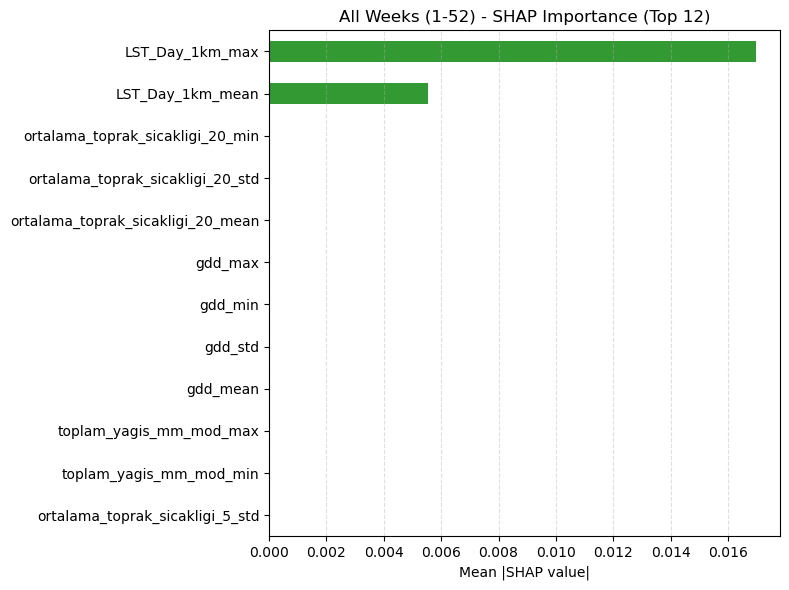

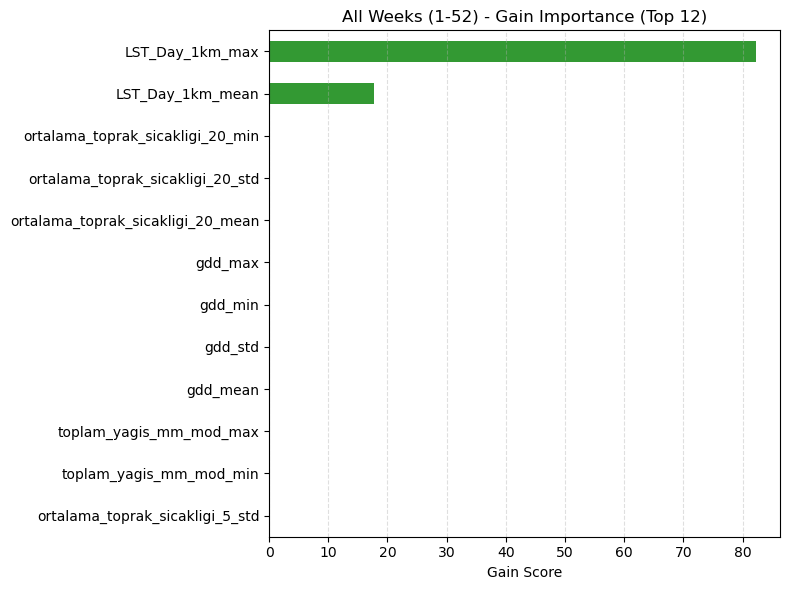

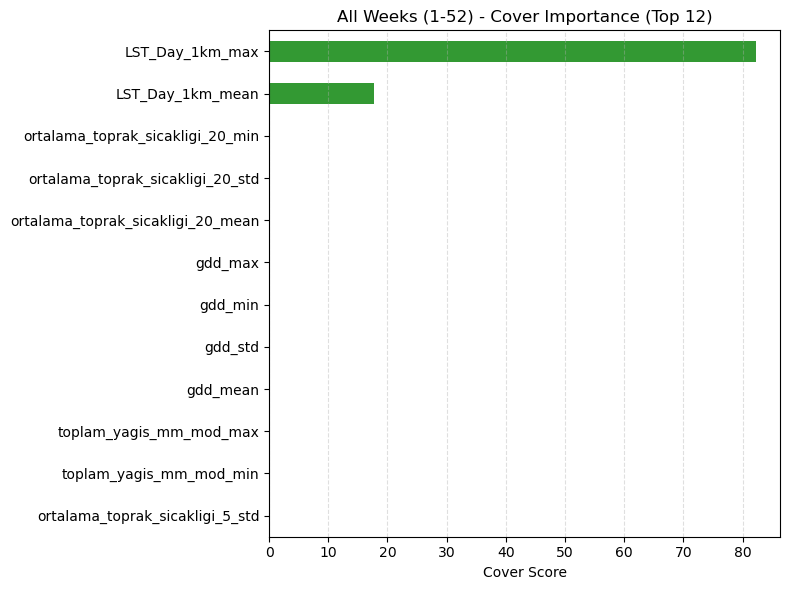

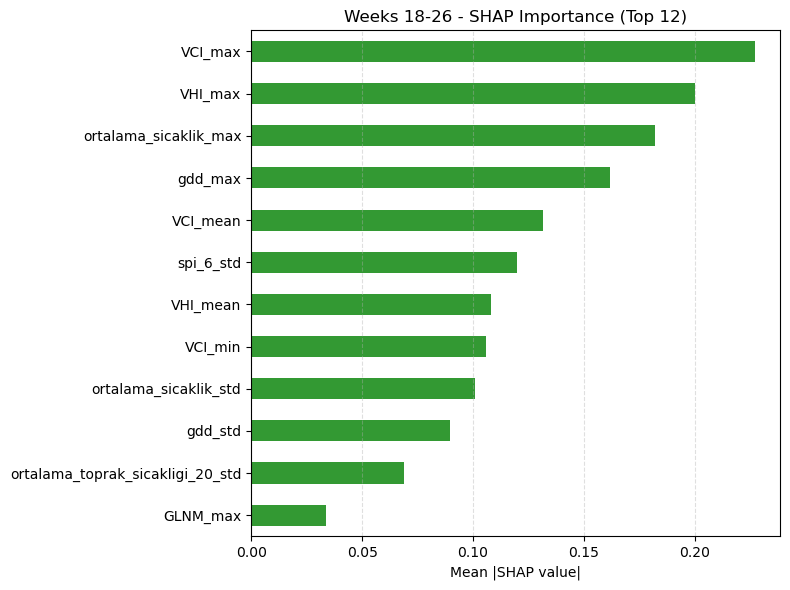

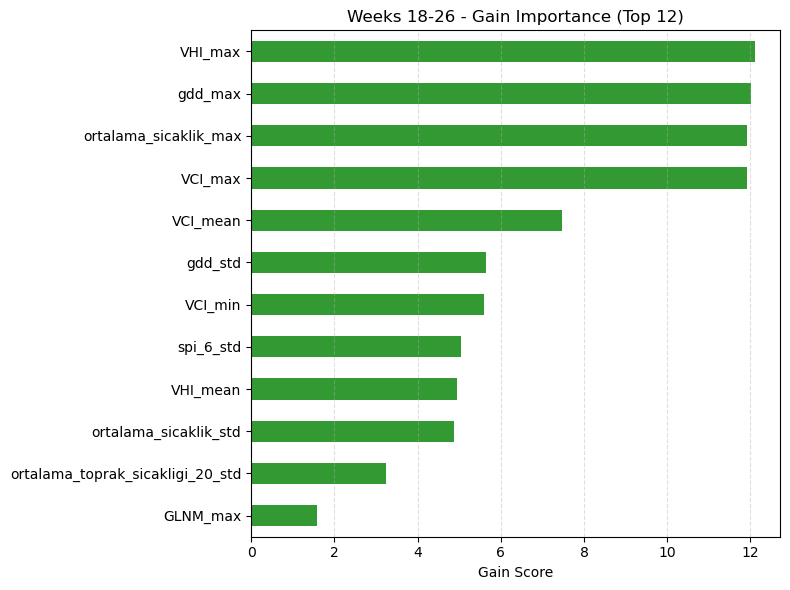

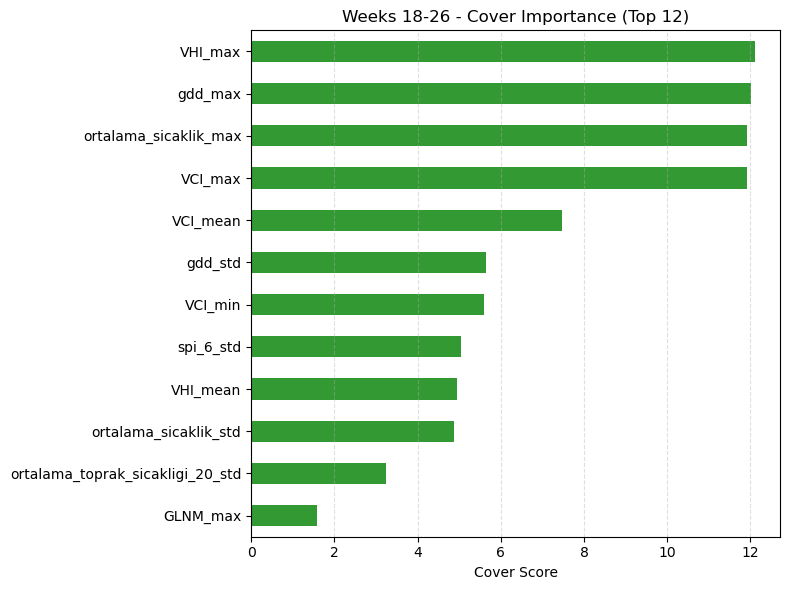

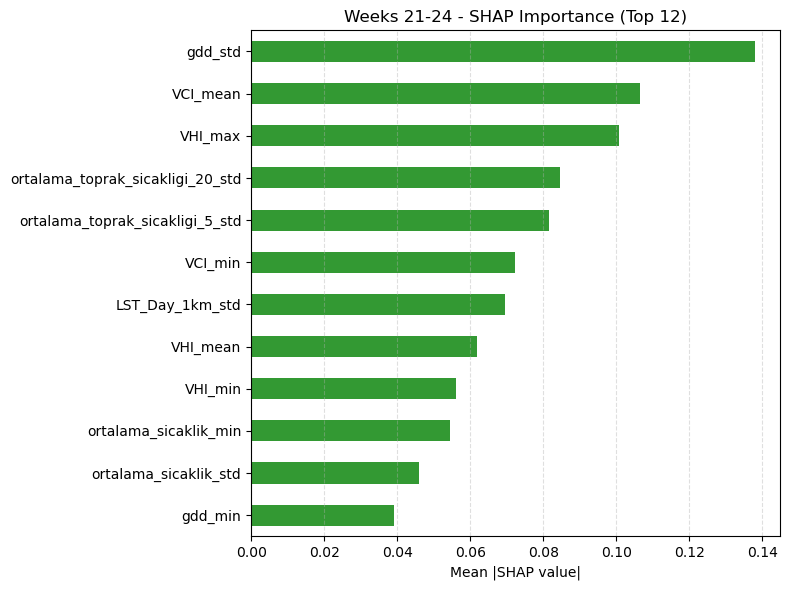

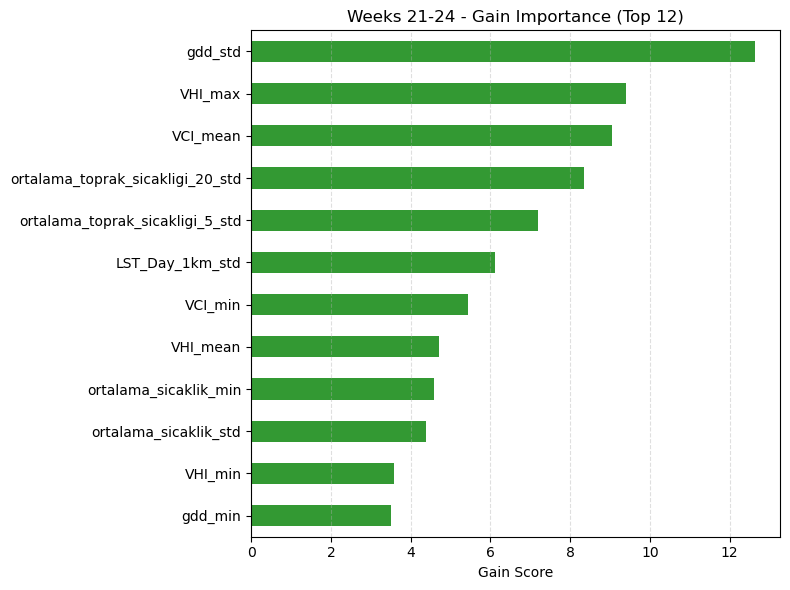

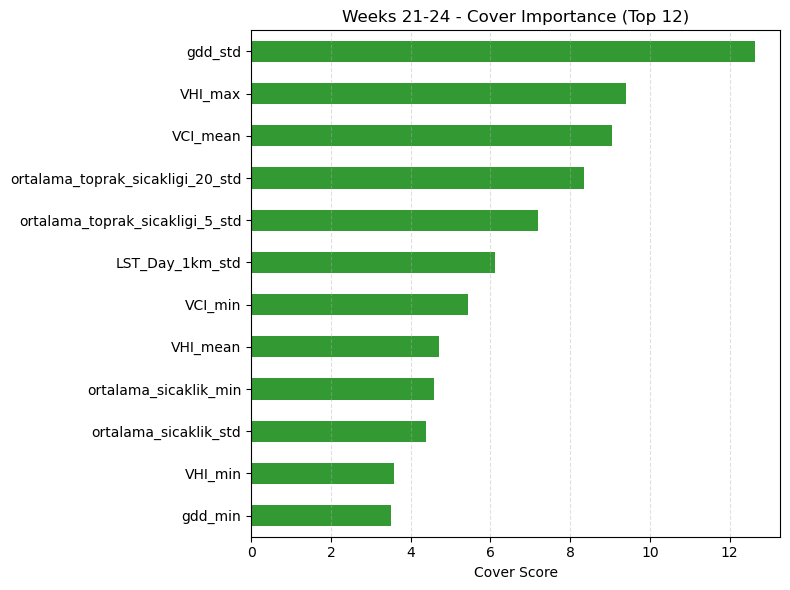

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

def plot_feature_importances(model, X, case_name):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap_means = np.abs(shap_values).mean(axis=0)
    shap_series = pd.Series(shap_means, index=X.columns).sort_values(ascending=False).head(12).sort_values()
    
    gain_vals = model.get_feature_importance(type='FeatureImportance')
    cover_vals = model.get_feature_importance(type='PredictionValuesChange')
    importance_df = pd.DataFrame({
        'gain': gain_vals,
        'cover': cover_vals
    }, index=X.columns)
    
    gain_series = importance_df['gain'].sort_values(ascending=False).head(12).sort_values()
    cover_series = importance_df['cover'].sort_values(ascending=False).head(12).sort_values()
    
    plt.figure(figsize=(8, 6))
    shap_series.plot(kind='barh', color='green', alpha=0.8)
    plt.title(f"{case_name} - SHAP Importance (Top 12)")
    plt.xlabel("Mean |SHAP value|")
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    gain_series.plot(kind='barh', color='green', alpha=0.8)
    plt.title(f"{case_name} - Gain Importance (Top 12)")
    plt.xlabel("Gain Score")
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    cover_series.plot(kind='barh', color='green', alpha=0.8)
    plt.title(f"{case_name} - Cover Importance (Top 12)")
    plt.xlabel("Cover Score")
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

results = run_year_aggregated_analysis(df, train_years, test_years, signal_vars)

# Model 1: All Weeks
model_1 = results['fixed_split']['all_weeks']['model']
X_1 = results['fixed_split']['all_weeks']['data'][0]  # X_train
plot_feature_importances(model_1, X_1, "All Weeks (1-52)")

# Model 2: Weeks 18-26
model_2 = results['fixed_split']['weeks_18_26']['model']
X_2 = results['fixed_split']['weeks_18_26']['data'][0]  # X_train
plot_feature_importances(model_2, X_2, "Weeks 18-26")

# Model 3: Weeks 21-24
model_3 = results['fixed_split']['weeks_21_24']['model']
X_3 = results['fixed_split']['weeks_21_24']['data'][0]  # X_train
plot_feature_importances(model_3, X_3, "Weeks 21-24")

---
## LSTM-GRU Hybrid Model with Attention Mechanism

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Embedding, Flatten, Concatenate, Layer, BatchNormalization
from tensorflow.keras.layers import Bidirectional, GRU, Conv1D, MaxPooling1D, MultiHeadAttention
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping  
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, LSTM, GRU, Dense, Dropout, Embedding, 
                                      Flatten, Concatenate, Bidirectional, 
                                      Conv1D, MaxPooling1D, BatchNormalization, 
                                      Layer, MultiHeadAttention)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ============================================
# SELECTED SIGNAL VARIABLES
# ============================================
SIGNAL_VARS = [
    'GLNM', 
    'spi_6', 'spi_3', 'spi_1',
    'toplam_yagis_mm_mod', 'gdd',
    'ortalama_toprak_sicakligi_20',
    'ortalama_toprak_nemi_20',
    'ortalama_sicaklik',
    'LST_Day_1km'
]

def load_data(file_path):
    """Load data and add drought labels"""
    df = pd.read_excel(file_path)
    drought_years = [2007, 2008, 2010, 2014, 2018, 2021]
    df["drought"] = df["yil"].apply(lambda x: 1 if x in drought_years else 0)
    return df


def preprocess_data(df, signal_vars=SIGNAL_VARS, week_range=(1, 52)):
    """Preprocess data with selected signal variables and week filter"""
    print(f"\n{'='*80}")
    print(f"DATA PREPROCESSING - Weeks {week_range[0]}-{week_range[1]}")
    print(f"{'='*80}")
    
    # Filter by week range FIRST
    df_filtered = df[df['hafta'].between(week_range[0], week_range[1])].copy()
    print(f"✓ Filtered to weeks {week_range[0]}-{week_range[1]}: {len(df_filtered)} samples")
    
    # Time-based split
    df_train = df_filtered[df_filtered['yil'].between(2007, 2017)].copy()
    df_test = df_filtered[df_filtered['yil'].between(2018, 2021)].copy()
    
    print(f"Train years: 2007-2017 ({len(df_train)} samples)")
    print(f"Test years: 2018-2021 ({len(df_test)} samples)")
    
    # Check signal variables
    available_signal_vars = [var for var in signal_vars if var in df_filtered.columns]
    missing_vars = [var for var in signal_vars if var not in df_filtered.columns]
    
    print(f"\n✓ Available signal variables ({len(available_signal_vars)}):")
    for var in available_signal_vars:
        print(f"  - {var}")
    
    if missing_vars:
        print(f"\n⚠ Missing signal variables ({len(missing_vars)}):")
        for var in missing_vars:
            print(f"  - {var}")
    
    numeric_features = available_signal_vars
    
    # Fill missing values
    for col in numeric_features:
        if df_train[col].dtype in [np.float64, np.int64]:
            mean_val = df_train[col].mean()
            df_train[col] = df_train[col].fillna(mean_val)
            df_test[col] = df_test[col].fillna(mean_val)
    
    print(f"\n✓ Using {len(numeric_features)} features for modeling")
    
    # Encode stations
    le = LabelEncoder()
    all_stations = df['istasyon_adi'].unique()
    le.fit(all_stations)
    
    df_train['station_encoded'] = le.transform(df_train['istasyon_adi'])
    df_test['station_encoded'] = le.transform(df_test['istasyon_adi'])
    n_stations = len(le.classes_)
    
    print(f"Encoded {n_stations} stations")
    
    # Scale features
    scaler = StandardScaler()
    df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
    df_test[numeric_features] = scaler.transform(df_test[numeric_features])
    
    print(f"✓ Features scaled using StandardScaler")
    print(f"{'='*80}\n")
    
    return df_train, df_test, n_stations, numeric_features, week_range


def prepare_time_series(df_train, df_test, numeric_features, week_range):
    """Prepare time series data for specific week range"""
    print(f"{'='*80}")
    print(f"TIME SERIES PREPARATION - Weeks {week_range[0]}-{week_range[1]}")
    print(f"{'='*80}")
    
    # Calculate sequence length based on week range
    seq_length = week_range[1] - week_range[0] + 1
    
    def create_time_series(df):
        """Create time series for each year-station combination"""
        all_xs, all_ys, all_stations, all_years, all_weeks = [], [], [], [], []
        
        for feature in numeric_features:
            if feature not in df.columns:
                raise ValueError(f"Feature '{feature}' not found in DataFrame")
        
        for (year, station), group in df.groupby(['yil', 'station_encoded']):
            if len(group) < 3:  # Minimum 3 weeks
                continue
            
            group = group.sort_values('hafta')
            
            # Create time series for the specific week range
            ts_data = np.zeros((seq_length, len(numeric_features)))
            
            for _, row in group.iterrows():
                week_idx = int(row['hafta']) - week_range[0]  # Adjust to 0-based index
                if 0 <= week_idx < seq_length:
                    ts_data[week_idx] = row[numeric_features].values
            
            all_xs.append(ts_data)
            all_ys.append(group['drought'].iloc[0])
            all_stations.append(station)
            all_years.append(year)
            all_weeks.append(np.arange(seq_length))
        
        if not all_xs:
            raise ValueError("No valid time series could be created")
        
        return (np.array(all_xs), np.array(all_ys), np.array(all_stations), 
                np.array(all_years), np.array(all_weeks))
    
    X_train, y_train, station_train, year_train, week_indices_train = create_time_series(df_train)
    X_test, y_test, station_test, year_test, week_indices_test = create_time_series(df_test)
    
    print(f"✓ Training time series: {X_train.shape[0]} samples")
    print(f"  - Shape: {X_train.shape} (samples × {seq_length} weeks × {X_train.shape[2]} features)")
    print(f"  - Drought samples: {y_train.sum()} ({y_train.mean():.2%})")
    
    print(f"✓ Testing time series: {X_test.shape[0]} samples")
    print(f"  - Shape: {X_test.shape}")
    print(f"  - Drought samples: {y_test.sum()} ({y_test.mean():.2%})")
    
    # Normalize years
    min_year = min(df_train['yil'].min(), df_test['yil'].min())
    max_year = max(df_train['yil'].max(), df_test['yil'].max())
    year_range = max_year - min_year + 1
    
    year_train_normalized = year_train - min_year
    year_test_normalized = year_test - min_year
    
    print(f"✓ Year range: {min_year}-{max_year} ({year_range} years)")
    print(f"{'='*80}\n")
    
    return (X_train, y_train, station_train, year_train_normalized, week_indices_train,
            X_test, y_test, station_test, year_test_normalized, week_indices_test, 
            year_range, seq_length)


class GuidedMultiHeadAttention(Layer):
    """Multi-head attention with guided bias for critical weeks"""
    
    def __init__(self, num_heads=4, key_dim=8, 
                 bias_weeks=list(range(18, 27)), bias_value=0.5, 
                 low_bias_weeks=list(range(0, 4)), low_bias_value=-0.3,
                 seq_length=52,
                 **kwargs):
        super(GuidedMultiHeadAttention, self).__init__(**kwargs)
        self.bias_weeks = bias_weeks
        self.bias_value = bias_value
        self.low_bias_weeks = low_bias_weeks
        self.low_bias_value = low_bias_value
        self.num_heads = num_heads
        self.key_dim = key_dim
        self.seq_length = seq_length
        
    def build(self, input_shape):
        self.multi_head_attn = MultiHeadAttention(
            num_heads=self.num_heads, 
            key_dim=self.key_dim
        )
        
        # Create bias vector
        bias_np = np.zeros((self.seq_length,))
        
        # High weight weeks (18-26) if they're in range
        for w in self.bias_weeks:
            if w < self.seq_length:
                bias_np[w] = self.bias_value
        
        # Low weight weeks (early season)
        for w in self.low_bias_weeks:
            if w < self.seq_length:
                bias_np[w] = self.low_bias_value
        
        self.bias_vector = tf.constant(bias_np, dtype=tf.float32)
        
    def call(self, inputs):
        x, week_index = inputs
        
        # Apply multi-head attention
        attn_output = self.multi_head_attn(query=x, value=x)
        
        # Apply guided attention with bias
        scores = tf.reduce_sum(attn_output, axis=-1)
        bias_added = scores + tf.gather(self.bias_vector, week_index)
        att_weights = tf.nn.softmax(bias_added, axis=1)
        
        # Context vector with attention weights
        context = tf.reduce_sum(attn_output * tf.expand_dims(att_weights, -1), axis=1)
        
        return context, att_weights


def build_model(n_stations, year_range, n_features, seq_length):
    """Build the drought prediction model"""
    print(f"{'='*80}")
    print("MODEL BUILDING")
    print(f"{'='*80}")
    print(f"Sequence length: {seq_length} weeks")
    print(f"Stations: {n_stations}")
    print(f"Year range: {year_range}")
    print(f"Features: {n_features}")
    print(f"{'='*80}\n")
    
    # Model inputs
    ts_input = Input(shape=(seq_length, n_features), name="timeseries_input")
    week_input = Input(shape=(seq_length,), dtype='int32', name="week_input")
    station_input = Input(shape=(), dtype='int32', name="station_input")
    year_input = Input(shape=(), dtype='int32', name="year_input")
    
    # Embeddings
    station_embed = Embedding(input_dim=n_stations, output_dim=8)(station_input)
    year_embed = Embedding(input_dim=year_range, output_dim=4)(year_input)
    station_flat = Flatten()(station_embed)
    year_flat = Flatten()(year_embed)
    
    # LSTM stream
    lstm_x = Bidirectional(LSTM(128, return_sequences=True))(ts_input)
    lstm_x = Dropout(0.3)(lstm_x)
    lstm_x = BatchNormalization()(lstm_x)
    lstm_x = Bidirectional(LSTM(64, return_sequences=True))(lstm_x)
    lstm_context, lstm_att_weights = GuidedMultiHeadAttention(seq_length=seq_length)(
        inputs=[lstm_x, week_input]
    )
    
    # GRU stream
    gru_x = Bidirectional(GRU(128, return_sequences=True))(ts_input)
    gru_x = Dropout(0.3)(gru_x)
    gru_x = BatchNormalization()(gru_x)
    gru_x = Bidirectional(GRU(64, return_sequences=True))(gru_x)
    gru_context, gru_att_weights = GuidedMultiHeadAttention(seq_length=seq_length)(
        inputs=[gru_x, week_input]
    )
    
    # CNN stream
    cnn_x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(ts_input)
    cnn_x = MaxPooling1D(pool_size=2, padding='same')(cnn_x)
    cnn_x = Dropout(0.3)(cnn_x)
    cnn_x = BatchNormalization()(cnn_x)
    cnn_x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(cnn_x)
    cnn_x = MaxPooling1D(pool_size=2, padding='same')(cnn_x)
    cnn_flattened = Flatten()(cnn_x)
    cnn_context = Dense(64, activation='relu')(cnn_flattened)
    
    # Merge models (ensemble)
    merged_context = Concatenate()([lstm_context, gru_context, cnn_context])
    merged_context = Dense(128, activation='relu')(merged_context)
    
    # Merge with metadata features
    merged = Concatenate()([merged_context, station_flat, year_flat])
    
    # Dense layers
    dense = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(merged)
    dense = Dropout(0.4)(dense)
    dense = BatchNormalization()(dense)
    dense = Dense(128, activation='relu')(dense)
    dense = Dropout(0.3)(dense)
    dense = Dense(64, activation='relu')(dense)
    
    output = Dense(1, activation='sigmoid', name='drought_prediction')(dense)
    
    inputs = {
        "timeseries_input": ts_input,
        "week_input": week_input,
        "station_input": station_input,
        "year_input": year_input
    }
    
    model = Model(inputs=inputs, outputs=output)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )
    
    attention_model = Model(
        inputs=inputs,
        outputs=[output, lstm_att_weights]
    )
    
    return model, attention_model


def train_model(model, X_train, y_train, X_test, y_test, 
                station_train, station_test, year_train, year_test, 
                week_indices_train, week_indices_test):
    """Train the model"""
    print(f"{'='*80}")
    print("MODEL TRAINING")
    print(f"{'='*80}\n")
    
    early_stop = EarlyStopping(
        monitor='val_loss', 
        patience=20, 
        restore_best_weights=True,
        verbose=1
    )
    
    # Class weights
    n_pos = y_train.sum()
    n_neg = len(y_train) - n_pos
    class_weight = {
        0: 1.0,
        1: min(n_neg / n_pos if n_pos > 0 else 1.0, 3.0)
    }
    
    print(f"Class weights: {class_weight}\n")
    
    history = model.fit(
        {
            "timeseries_input": X_train,
            "week_input": week_indices_train,
            "station_input": station_train,
            "year_input": year_train
        },
        y_train,
        validation_data=(
            {
                "timeseries_input": X_test,
                "week_input": week_indices_test,
                "station_input": station_test,
                "year_input": year_test
            },
            y_test
        ),
        epochs=100,
        batch_size=16,
        class_weight=class_weight,
        callbacks=[early_stop],
        verbose=0  # Changed to 0 for cleaner output
    )
    
    print(f"✓ Training completed in {len(history.history['loss'])} epochs")
    print(f"  Final train loss: {history.history['loss'][-1]:.4f}")
    print(f"  Final val loss: {history.history['val_loss'][-1]:.4f}\n")
    
    return history


def evaluate_model_simple(model, X_train, y_train, X_test, y_test, 
                         station_train, station_test, year_train, year_test, 
                         week_indices_train, week_indices_test):
    """Evaluate model and return metrics"""
    
    # Train predictions
    y_train_pred_proba = model.predict({
        "timeseries_input": X_train,
        "week_input": week_indices_train,
        "station_input": station_train,
        "year_input": year_train
    }, verbose=0).flatten()
    y_train_pred = (y_train_pred_proba > 0.5).astype(int)
    
    # Test predictions
    y_test_pred_proba = model.predict({
        "timeseries_input": X_test,
        "week_input": week_indices_test,
        "station_input": station_test,
        "year_input": year_test
    }, verbose=0).flatten()
    y_test_pred = (y_test_pred_proba > 0.5).astype(int)
    
    # Calculate metrics
    metrics = {
        'train': {
            'accuracy': accuracy_score(y_train, y_train_pred),
            'precision': precision_score(y_train, y_train_pred, zero_division=0),
            'recall': recall_score(y_train, y_train_pred, zero_division=0),
            'f1': f1_score(y_train, y_train_pred, zero_division=0)
        },
        'test': {
            'accuracy': accuracy_score(y_test, y_test_pred),
            'precision': precision_score(y_test, y_test_pred, zero_division=0),
            'recall': recall_score(y_test, y_test_pred, zero_division=0),
            'f1': f1_score(y_test, y_test_pred, zero_division=0)
        }
    }
    
    # Add AUC if possible
    try:
        metrics['train']['auc'] = roc_auc_score(y_train, y_train_pred_proba)
        metrics['test']['auc'] = roc_auc_score(y_test, y_test_pred_proba)
    except:
        metrics['train']['auc'] = None
        metrics['test']['auc'] = None
    
    # Calculate overfitting gap
    metrics['overfit_gap'] = metrics['train']['accuracy'] - metrics['test']['accuracy']
    
    return metrics


def run_single_scenario(df, week_range, scenario_name):
    """Run model for a single week range scenario"""
    print(f"\n\n{'#'*80}")
    print(f"# SCENARIO: {scenario_name}")
    print(f"# Week Range: {week_range[0]}-{week_range[1]}")
    print(f"{'#'*80}\n")
    
    # 1. Preprocess
    df_train, df_test, n_stations, numeric_features, _ = preprocess_data(
        df, SIGNAL_VARS, week_range
    )
    
    # 2. Prepare time series
    (X_train, y_train, station_train, year_train, week_indices_train,
     X_test, y_test, station_test, year_test, week_indices_test, 
     year_range_val, seq_length) = prepare_time_series(
        df_train, df_test, numeric_features, week_range
    )
    
    # 3. Build model
    model, attention_model = build_model(
        n_stations, year_range_val, X_train.shape[2], seq_length
    )
    
    # 4. Train model
    history = train_model(
        model, X_train, y_train, X_test, y_test, 
        station_train, station_test, year_train, year_test, 
        week_indices_train, week_indices_test
    )
    
    # 5. Evaluate model
    metrics = evaluate_model_simple(
        model, X_train, y_train, X_test, y_test, 
        station_train, station_test, year_train, year_test, 
        week_indices_train, week_indices_test
    )
    
    # Print results
    print(f"{'='*80}")
    print(f"RESULTS - {scenario_name}")
    print(f"{'='*80}")
    print(f"TRAIN: Acc={metrics['train']['accuracy']:.3f} | "
          f"Prec={metrics['train']['precision']:.3f} | "
          f"Rec={metrics['train']['recall']:.3f} | "
          f"F1={metrics['train']['f1']:.3f}")
    print(f"TEST:  Acc={metrics['test']['accuracy']:.3f} | "
          f"Prec={metrics['test']['precision']:.3f} | "
          f"Rec={metrics['test']['recall']:.3f} | "
          f"F1={metrics['test']['f1']:.3f}")
    print(f"Overfitting Gap: {metrics['overfit_gap']:.3f}")
    
    if metrics['overfit_gap'] > 0.15:
        print("HIGH overfitting!")
    elif metrics['overfit_gap'] > 0.10:
        print("Moderate overfitting")
    else:
        print("✓ Good generalization")
    print(f"{'='*80}\n")
    
    return {
        'scenario': scenario_name,
        'week_range': week_range,
        'metrics': metrics,
        'model': model,
        'attention_model': attention_model,
        'history': history,
        'test_data': (X_test, y_test, station_test, year_test, week_indices_test)
    }


def compare_scenarios(results):
    """Compare results from all scenarios"""
    print(f"\n\n{'='*80}")
    print(f"{'='*80}")
    print("FINAL COMPARISON: ALL SCENARIOS")
    print(f"{'='*80}")
    print(f"{'='*80}\n")
    
    comparison_data = []
    for result in results:
        comparison_data.append({
            'Scenario': result['scenario'],
            'Weeks': f"{result['week_range'][0]}-{result['week_range'][1]}",
            'Train Acc': f"{result['metrics']['train']['accuracy']:.3f}",
            'Test Acc': f"{result['metrics']['test']['accuracy']:.3f}",
            'Test Prec': f"{result['metrics']['test']['precision']:.3f}",
            'Test Rec': f"{result['metrics']['test']['recall']:.3f}",
            'Test F1': f"{result['metrics']['test']['f1']:.3f}",
            'Overfit': f"{result['metrics']['overfit_gap']:.3f}"
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.to_string(index=False))
    print()
    
    # Find best model
    best_test_f1 = max([r['metrics']['test']['f1'] for r in results])
    best_result = [r for r in results if r['metrics']['test']['f1'] == best_test_f1][0]
    
    print(f"BEST MODEL: {best_result['scenario']}")
    print(f"Test F1-Score: {best_test_f1:.3f}")
    print(f"Weeks: {best_result['week_range'][0]}-{best_result['week_range'][1]}")
    print()


def main():
    """Main execution function"""
    print("\n" + "="*80)
    print("DROUGHT CLASSIFICATION - MULTI-SCENARIO ANALYSIS")
    print("="*80 + "\n")
    
    # Load data once
    df = load_data("all_merged_final_updated.xlsx")
    print(f"✓ Data loaded: {len(df)} total samples\n")
    
    # Define scenarios
    scenarios = [
        {
            'name': 'All Weeks',
            'week_range': (1, 52)
        },
        {
            'name': 'Weeks 18-26 (Critical Period)',
            'week_range': (18, 26)
        },
        {
            'name': 'Weeks 21-24 (Peak Sensitivity)',
            'week_range': (21, 24)
        }
    ]
    
    # Run all scenarios
    results = []
    for scenario in scenarios:
        result = run_single_scenario(
            df, 
            scenario['week_range'], 
            scenario['name']
        )
        results.append(result)
    
    # Compare scenarios
    compare_scenarios(results)
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE!")
    print("="*80 + "\n")
    
    return results


if __name__ == "__main__":
    results = main()


DROUGHT CLASSIFICATION - MULTI-SCENARIO ANALYSIS

✓ Data loaded: 13807 total samples



################################################################################
# SCENARIO: All Weeks
# Week Range: 1-52
################################################################################


DATA PREPROCESSING - Weeks 1-52
✓ Filtered to weeks 1-52: 13747 samples
Train years: 2007-2017 (8456 samples)
Test years: 2018-2021 (5291 samples)

✓ Available signal variables (10):
  - GLNM
  - spi_6
  - spi_3
  - spi_1
  - toplam_yagis_mm_mod
  - gdd
  - ortalama_toprak_sicakligi_20
  - ortalama_toprak_nemi_20
  - ortalama_sicaklik
  - LST_Day_1km

✓ Using 10 features for modeling
✓ Encoded 26 stations
✓ Features scaled using StandardScaler

TIME SERIES PREPARATION - Weeks 1-52
✓ Training time series: 166 samples
  - Shape: (166, 52, 10) (samples × 52 weeks × 10 features)
  - Drought samples: 54 (32.53%)
✓ Testing time series: 102 samples
  - Shape: (102, 52, 10)
  - Drought samples: 51 (50.00%


DROUGHT CLASSIFICATION WITH SELECTED SIGNAL VARIABLES

✓ Data loaded: 13807 total samples


DATA PREPROCESSING
Train years: 2007-2017 (8490 samples)
Test years: 2018-2021 (5317 samples)

✓ Available signal variables (10):
  - GLNM
  - spi_6
  - spi_3
  - spi_1
  - toplam_yagis_mm_mod
  - gdd
  - ortalama_toprak_sicakligi_20
  - ortalama_toprak_nemi_20
  - ortalama_sicaklik
  - LST_Day_1km

✓ Using 10 features for modeling
✓ Encoded 26 stations
✓ Features scaled using StandardScaler

TIME SERIES PREPARATION
✓ Training time series: 166 samples
  - Shape: (166, 52, 10)
  - Drought samples: 54 (32.53%)
✓ Testing time series: 102 samples
  - Shape: (102, 52, 10)
  - Drought samples: 51 (50.00%)
✓ Year range: 2007-2021 (15 years)

MODEL BUILDING
Stations: 26
Year range: 15
Features: 10



Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ timeseries_input    │ (None, 52, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 52, 128)   │      3,968 │ timeseries_input… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 26, 128)   │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 26, 128)   │          0 │ max_pooling1d_4[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_8     │ (None, 52, 256)   │    142,336 │ timeseries_input… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_10    │ (None, 52, 256)   │    107,520 │ timeseries_input… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 26, 128)   │        512 │ dropout_18[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 52, 256)   │          0 │ bidirectional_8[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 52, 256)   │          0 │ bidirectional_10… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 26, 64)    │     24,640 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 256)   │      1,024 │ dropout_14[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 256)   │      1,024 │ dropout_16[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_5     │ (None, 13, 64)    │          0 │ conv1d_5[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_9     │ (None, 52, 128)   │    164,352 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ week_input          │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_11    │ (None, 52, 128)   │    123,648 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 832)       │          0 │ max_pooling1d_5[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 775,245 (2.96 MB)

 Trainable params: 773,453 (2.95 MB)

 Non-trainable params: 1,792 (7.00 KB)

MODEL TRAINING

Class weights: {0: 1.0, 1: 2.074074074074074}

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - AUC: 0.4564 - accuracy: 0.5433 - loss: 1.1463 - val_AUC: 0.5117 - val_accuracy: 0.5098 - val_loss: 0.7112
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - AUC: 0.6021 - accuracy: 0.6261 - loss: 0.9501 - val_AUC: 0.5980 - val_accuracy: 0.6078 - val_loss: 0.7088
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - AUC: 0.6363 - accuracy: 0.5825 - loss: 0.9460 - val_AUC: 0.6503 - val_accuracy: 0.6373 - val_loss: 0.7074
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - AUC: 0.5561 - accuracy: 0.5794 - loss: 1.0076 - val_AUC: 0.7405 - val_accuracy: 0.6863 - val_loss: 0.7051
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - AUC: 0.5813 - accuracy: 0.5836 - loss: 0.9766 - val_AUC: 0.8045 - val_accuracy: 0.6863 - val_loss: 0.7027
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - AUC: 0.7556 - accuracy: 0.6561 - loss: 0.8264 - val_AUC: 0.8389 - val_accuracy: 0.7

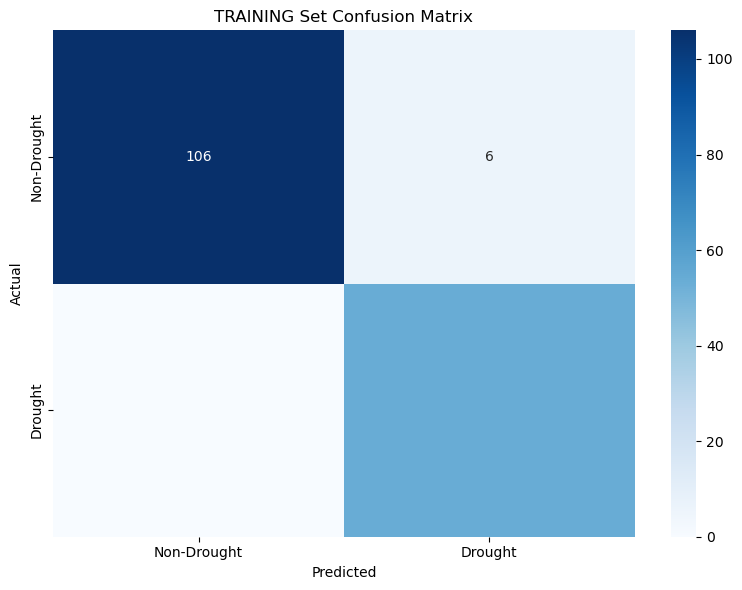


-------------------- TEST SET --------------------
AUC: 0.8693
Accuracy: 0.7549

Classification Report:
              precision    recall  f1-score   support

 Non-Drought       0.68      0.96      0.80        51
     Drought       0.93      0.55      0.69        51

    accuracy                           0.75       102
   macro avg       0.81      0.75      0.74       102
weighted avg       0.81      0.75      0.74       102



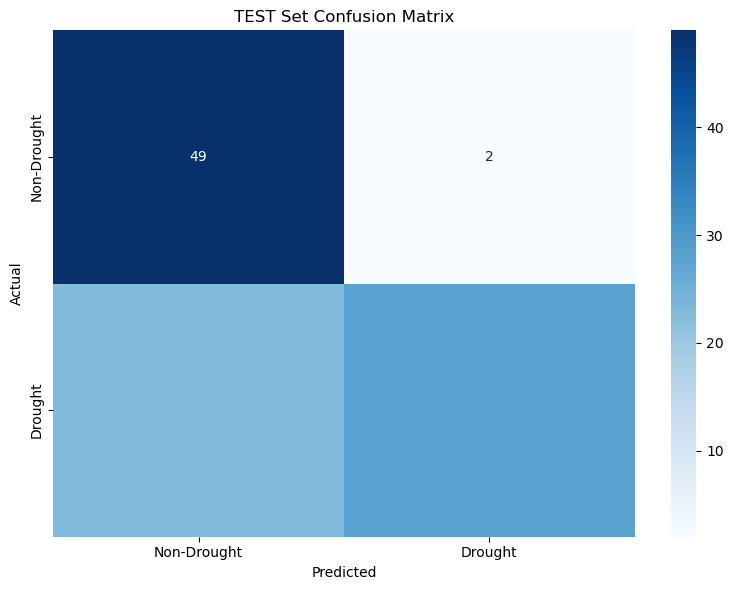


ATTENTION VISUALIZATION



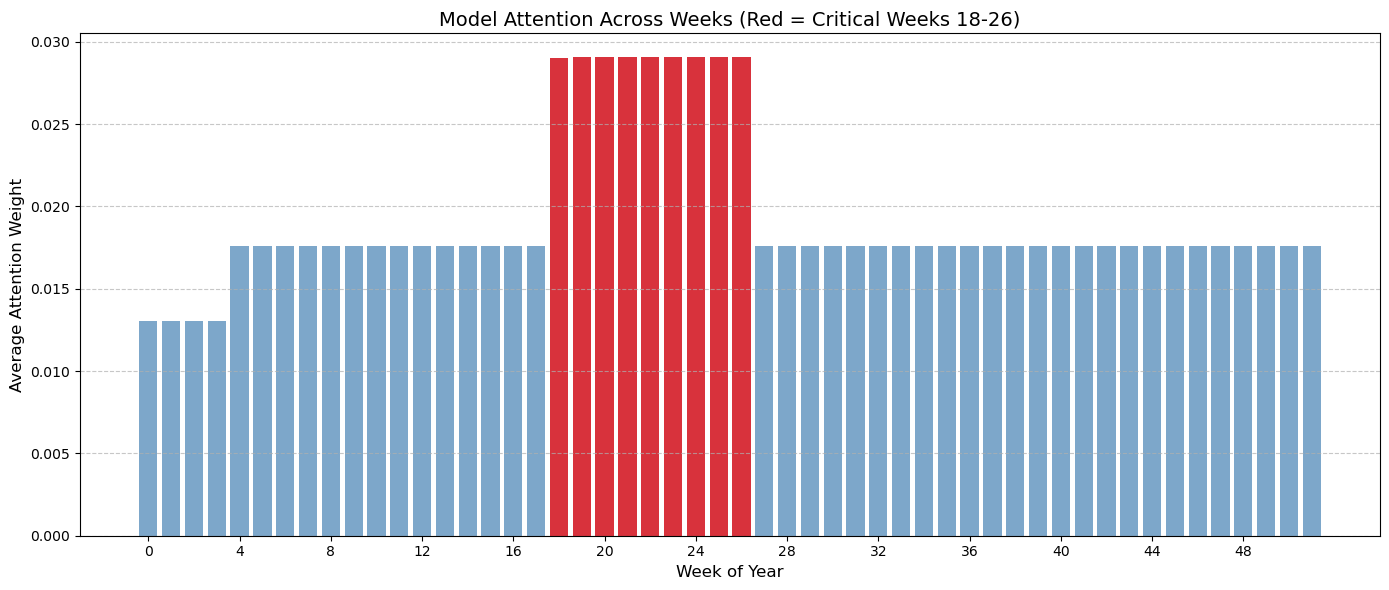

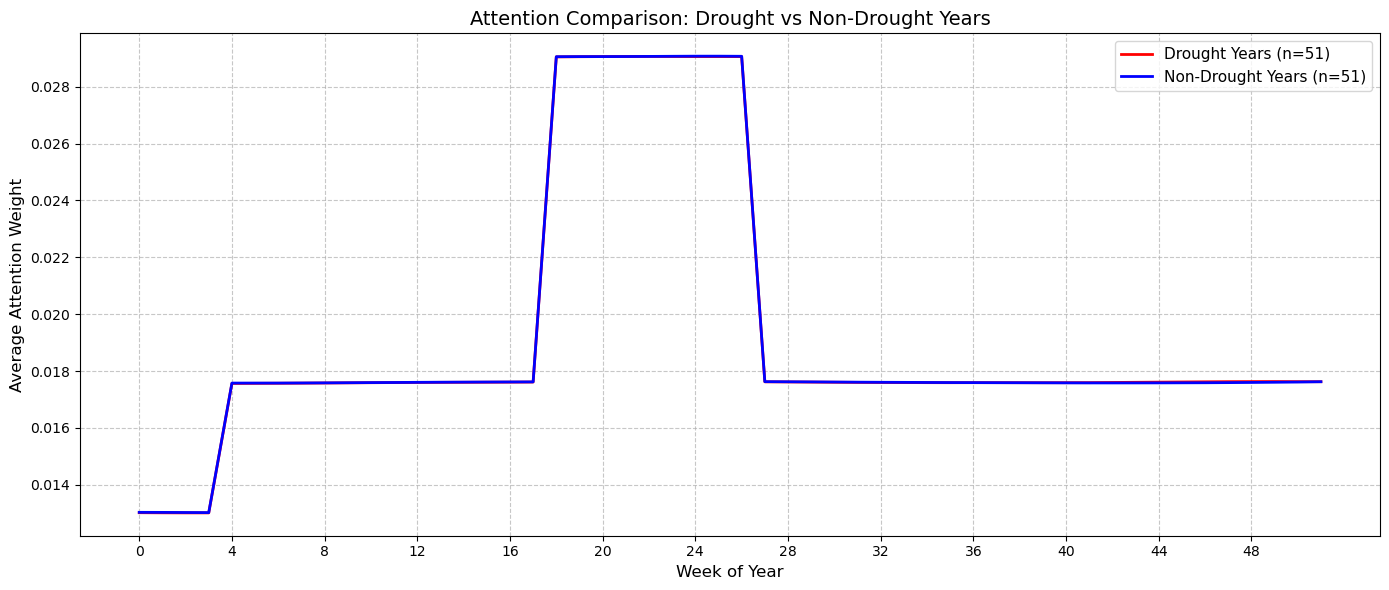

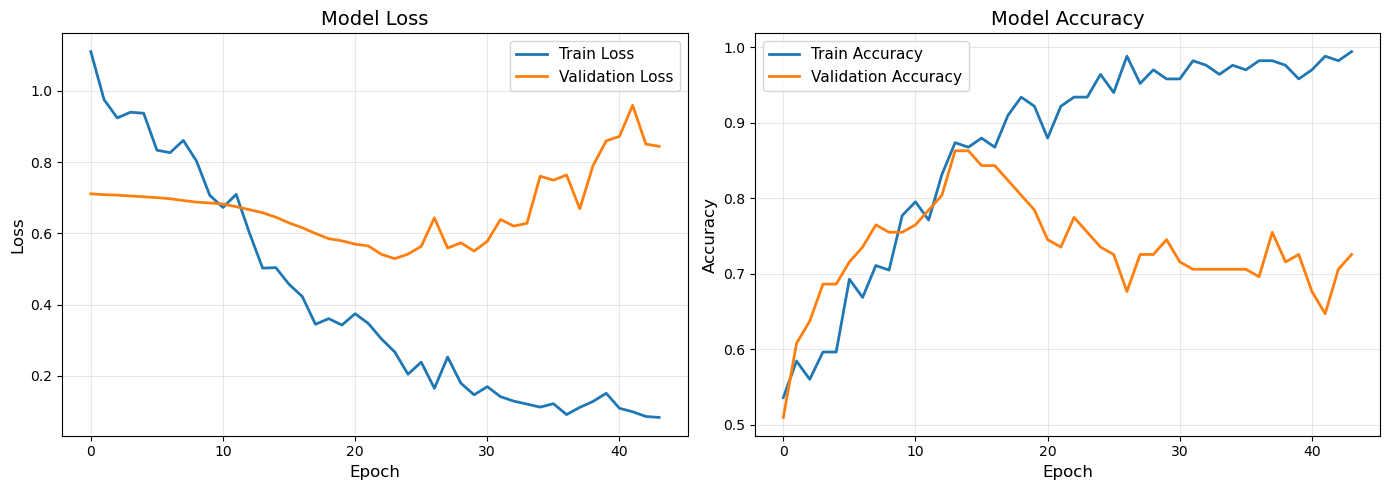


✓ Model successfully saved as drought_model.keras

ANALYSIS COMPLETE!



In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, LSTM, GRU, Dense, Dropout, Embedding, 
                                      Flatten, Concatenate, Bidirectional, 
                                      Conv1D, MaxPooling1D, BatchNormalization, 
                                      Layer, MultiHeadAttention)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ============================================
# SELECTED SIGNAL VARIABLES
# ============================================
SIGNAL_VARS = [
    'GLNM', 
    'spi_6', 'spi_3', 'spi_1',
    'toplam_yagis_mm_mod', 'gdd',
    'ortalama_toprak_sicakligi_20',
    'ortalama_toprak_nemi_20',
    'ortalama_sicaklik',
    'LST_Day_1km'
]

def load_data(file_path):
    """Load data and add drought labels"""
    df = pd.read_excel(file_path)
    drought_years = [2007, 2008, 2010, 2014, 2018, 2021]
    df["drought"] = df["yil"].apply(lambda x: 1 if x in drought_years else 0)
    return df


def preprocess_data(df, signal_vars=SIGNAL_VARS):
    """Preprocess data with selected signal variables"""
    print(f"\n{'='*80}")
    print("DATA PREPROCESSING")
    print(f"{'='*80}")
    
    # Time-based split (2007-2017 for training, 2018-2021 for testing)
    df_train = df[df['yil'].between(2007, 2017)].copy()
    df_test = df[df['yil'].between(2018, 2021)].copy()
    
    print(f"Train years: 2007-2017 ({len(df_train)} samples)")
    print(f"Test years: 2018-2021 ({len(df_test)} samples)")
    
    # Check which signal variables exist in the data
    available_signal_vars = [var for var in signal_vars if var in df.columns]
    missing_vars = [var for var in signal_vars if var not in df.columns]
    
    print(f"\n✓ Available signal variables ({len(available_signal_vars)}):")
    for var in available_signal_vars:
        print(f"  - {var}")
    
    if missing_vars:
        print(f"\n⚠ Missing signal variables ({len(missing_vars)}):")
        for var in missing_vars:
            print(f"  - {var}")
    
    # Use only available signal variables as features
    numeric_features = available_signal_vars
    
    # Fill missing values with training set mean
    for col in numeric_features:
        if df_train[col].dtype in [np.float64, np.int64]:
            mean_val = df_train[col].mean()
            df_train[col] = df_train[col].fillna(mean_val)
            df_test[col] = df_test[col].fillna(mean_val)
            
    print(f"\n✓ Using {len(numeric_features)} features for modeling")
    
    # Encode stations
    le = LabelEncoder()
    all_stations = df['istasyon_adi'].unique()
    le.fit(all_stations)
    
    df_train['station_encoded'] = le.transform(df_train['istasyon_adi'])
    df_test['station_encoded'] = le.transform(df_test['istasyon_adi'])
    n_stations = len(le.classes_)
    
    print(f"✓ Encoded {n_stations} stations")
    
    # Scale features
    scaler = StandardScaler()
    df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
    df_test[numeric_features] = scaler.transform(df_test[numeric_features])
    
    print(f"✓ Features scaled using StandardScaler")
    print(f"{'='*80}\n")
    
    return df_train, df_test, n_stations, numeric_features


def prepare_time_series(df_train, df_test, numeric_features):
    """Prepare time series data"""
    print(f"{'='*80}")
    print("TIME SERIES PREPARATION")
    print(f"{'='*80}")
    
    def create_time_series(df):
        """Create time series for each year-station combination"""
        all_xs, all_ys, all_stations, all_years, all_weeks = [], [], [], [], []
        
        # Check if features exist
        for feature in numeric_features:
            if feature not in df.columns:
                raise ValueError(f"Feature '{feature}' not found in DataFrame")
        
        for (year, station), group in df.groupby(['yil', 'station_encoded']):
            if len(group) < 10:
                continue
            
            # Sort by week
            group = group.sort_values('hafta')
            
            # Create time series for 52 weeks (pad if less than 52 weeks)
            ts_data = np.zeros((52, len(numeric_features)))
            
            for _, row in group.iterrows():
                week_idx = int(row['hafta']) - 1
                if 0 <= week_idx < 52:
                    ts_data[week_idx] = row[numeric_features].values
            
            all_xs.append(ts_data)
            all_ys.append(group['drought'].iloc[0])
            all_stations.append(station)
            all_years.append(year)
            all_weeks.append(np.arange(52))
        
        if not all_xs:
            raise ValueError("No valid time series could be created")
        
        return (np.array(all_xs), np.array(all_ys), np.array(all_stations), 
                np.array(all_years), np.array(all_weeks))
    
    # Create time series
    X_train, y_train, station_train, year_train, week_indices_train = create_time_series(df_train)
    X_test, y_test, station_test, year_test, week_indices_test = create_time_series(df_test)
    
    print(f"✓ Training time series: {X_train.shape[0]} samples")
    print(f"  - Shape: {X_train.shape}")
    print(f"  - Drought samples: {y_train.sum()} ({y_train.mean():.2%})")
    
    print(f"✓ Testing time series: {X_test.shape[0]} samples")
    print(f"  - Shape: {X_test.shape}")
    print(f"  - Drought samples: {y_test.sum()} ({y_test.mean():.2%})")
    
    # Normalize years
    min_year = min(df_train['yil'].min(), df_test['yil'].min())
    max_year = max(df_train['yil'].max(), df_test['yil'].max())
    year_range = max_year - min_year + 1
    
    year_train_normalized = year_train - min_year
    year_test_normalized = year_test - min_year
    
    print(f"✓ Year range: {min_year}-{max_year} ({year_range} years)")
    print(f"{'='*80}\n")
    
    return (X_train, y_train, station_train, year_train_normalized, week_indices_train,
            X_test, y_test, station_test, year_test_normalized, week_indices_test, year_range)


class GuidedMultiHeadAttention(Layer):
    """Multi-head attention with guided bias for critical weeks"""
    
    def __init__(self, num_heads=4, key_dim=8, 
                 bias_weeks=list(range(18, 27)), bias_value=0.5, 
                 low_bias_weeks=list(range(0, 4)), low_bias_value=-0.3,
                 **kwargs):
        super(GuidedMultiHeadAttention, self).__init__(**kwargs)
        self.bias_weeks = bias_weeks
        self.bias_value = bias_value
        self.low_bias_weeks = low_bias_weeks
        self.low_bias_value = low_bias_value
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.multi_head_attn = MultiHeadAttention(
            num_heads=self.num_heads, 
            key_dim=self.key_dim
        )
        
        # Create bias vector
        bias_np = np.zeros((52,))
        
        # High weight weeks (18-26)
        for w in self.bias_weeks:
            bias_np[w] = self.bias_value
        
        # Low weight weeks (early season)
        for w in self.low_bias_weeks:
            bias_np[w] = self.low_bias_value
        
        self.bias_vector = tf.constant(bias_np, dtype=tf.float32)
        
    def call(self, inputs):
        x, week_index = inputs
        
        # Apply multi-head attention
        attn_output = self.multi_head_attn(query=x, value=x)
        
        # Apply guided attention with bias
        scores = tf.reduce_sum(attn_output, axis=-1)
        bias_added = scores + tf.gather(self.bias_vector, week_index)
        att_weights = tf.nn.softmax(bias_added, axis=1)
        
        # Context vector with attention weights
        context = tf.reduce_sum(attn_output * tf.expand_dims(att_weights, -1), axis=1)
        
        return context, att_weights


def build_model(n_stations, year_range, n_features):
    """Build the drought prediction model"""
    print(f"{'='*80}")
    print("MODEL BUILDING")
    print(f"{'='*80}")
    print(f"Stations: {n_stations}")
    print(f"Year range: {year_range}")
    print(f"Features: {n_features}")
    print(f"{'='*80}\n")
    
    # Model inputs
    ts_input = Input(shape=(52, n_features), name="timeseries_input")
    week_input = Input(shape=(52,), dtype='int32', name="week_input")
    station_input = Input(shape=(), dtype='int32', name="station_input")
    year_input = Input(shape=(), dtype='int32', name="year_input")
    
    # Embeddings
    station_embed = Embedding(input_dim=n_stations, output_dim=8)(station_input)
    year_embed = Embedding(input_dim=year_range, output_dim=4)(year_input)
    station_flat = Flatten()(station_embed)
    year_flat = Flatten()(year_embed)
    
    # LSTM stream
    lstm_x = Bidirectional(LSTM(128, return_sequences=True))(ts_input)
    lstm_x = Dropout(0.3)(lstm_x)
    lstm_x = BatchNormalization()(lstm_x)
    lstm_x = Bidirectional(LSTM(64, return_sequences=True))(lstm_x)
    lstm_context, lstm_att_weights = GuidedMultiHeadAttention()(
        inputs=[lstm_x, week_input]
    )
    
    # GRU stream
    gru_x = Bidirectional(GRU(128, return_sequences=True))(ts_input)
    gru_x = Dropout(0.3)(gru_x)
    gru_x = BatchNormalization()(gru_x)
    gru_x = Bidirectional(GRU(64, return_sequences=True))(gru_x)
    gru_context, gru_att_weights = GuidedMultiHeadAttention()(
        inputs=[gru_x, week_input]
    )
    
    # CNN stream
    cnn_x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(ts_input)
    cnn_x = MaxPooling1D(pool_size=2, padding='same')(cnn_x)
    cnn_x = Dropout(0.3)(cnn_x)
    cnn_x = BatchNormalization()(cnn_x)
    cnn_x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(cnn_x)
    cnn_x = MaxPooling1D(pool_size=2, padding='same')(cnn_x)
    cnn_flattened = Flatten()(cnn_x)
    cnn_context = Dense(64, activation='relu')(cnn_flattened)
    
    # Merge models (ensemble)
    merged_context = Concatenate()([lstm_context, gru_context, cnn_context])
    merged_context = Dense(128, activation='relu')(merged_context)
    
    # Merge with metadata features
    merged = Concatenate()([merged_context, station_flat, year_flat])
    
    # Dense layers
    dense = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(merged)
    dense = Dropout(0.4)(dense)
    dense = BatchNormalization()(dense)
    dense = Dense(128, activation='relu')(dense)
    dense = Dropout(0.3)(dense)
    dense = Dense(64, activation='relu')(dense)
    
    output = Dense(1, activation='sigmoid', name='drought_prediction')(dense)
    
    inputs = {
        "timeseries_input": ts_input,
        "week_input": week_input,
        "station_input": station_input,
        "year_input": year_input
    }
    
    model = Model(inputs=inputs, outputs=output)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )
    
    # Attention visualization model
    attention_model = Model(
        inputs=inputs,
        outputs=[output, lstm_att_weights]
    )
    
    return model, attention_model


def train_model(model, X_train, y_train, X_test, y_test, 
                station_train, station_test, year_train, year_test, 
                week_indices_train, week_indices_test):
    """Train the model"""
    print(f"{'='*80}")
    print("MODEL TRAINING")
    print(f"{'='*80}\n")
    
    early_stop = EarlyStopping(
        monitor='val_loss', 
        patience=20, 
        restore_best_weights=True,
        verbose=1
    )
    
    # Class weights for imbalanced data
    n_pos = y_train.sum()
    n_neg = len(y_train) - n_pos
    class_weight = {
        0: 1.0,
        1: min(n_neg / n_pos if n_pos > 0 else 1.0, 3.0)
    }
    
    print(f"Class weights: {class_weight}\n")
    
    history = model.fit(
        {
            "timeseries_input": X_train,
            "week_input": week_indices_train,
            "station_input": station_train,
            "year_input": year_train
        },
        y_train,
        validation_data=(
            {
                "timeseries_input": X_test,
                "week_input": week_indices_test,
                "station_input": station_test,
                "year_input": year_test
            },
            y_test
        ),
        epochs=100,
        batch_size=16,
        class_weight=class_weight,
        callbacks=[early_stop],
        verbose=1
    )
    
    return history


def evaluate_model(model, X_train, y_train, X_test, y_test, 
                  station_train, station_test, year_train, year_test, 
                  week_indices_train, week_indices_test):
    """Evaluate model performance"""
    print(f"\n{'='*80}")
    print("MODEL EVALUATION")
    print(f"{'='*80}")
    
    def evaluate_dataset(X, y, station, year, week_indices, dataset_name):
        print(f"\n{'-'*20} {dataset_name} SET {'-'*20}")
        
        y_pred_proba = model.predict({
            "timeseries_input": X,
            "week_input": week_indices,
            "station_input": station,
            "year_input": year
        }, verbose=0)
        
        y_pred = (y_pred_proba > 0.5).astype(int).flatten()
        y_pred_proba = y_pred_proba.flatten()
        
        accuracy = accuracy_score(y, y_pred)
        
        try:
            auc = roc_auc_score(y, y_pred_proba)
            print(f"AUC: {auc:.4f}")
        except:
            auc = None
            print("AUC: N/A")
        
        print(f"Accuracy: {accuracy:.4f}")
        print(f"\nClassification Report:")
        print(classification_report(y, y_pred, 
                                   target_names=['Non-Drought', 'Drought']))
        
        # Confusion matrix
        cm = confusion_matrix(y, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Non-Drought', 'Drought'],
                    yticklabels=['Non-Drought', 'Drought'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'{dataset_name} Set Confusion Matrix')
        plt.tight_layout()
        plt.show()
        
        return y_pred, y_pred_proba
    
    # Evaluate on both sets
    train_pred, train_pred_proba = evaluate_dataset(
        X_train, y_train, station_train, year_train, 
        week_indices_train, "TRAINING"
    )
    
    test_pred, test_pred_proba = evaluate_dataset(
        X_test, y_test, station_test, year_test, 
        week_indices_test, "TEST"
    )
    
    print(f"{'='*80}\n")
    
    return (train_pred, train_pred_proba, test_pred, test_pred_proba)


def visualize_attention(attention_model, X_test, y_test, 
                       station_test, year_test, week_indices_test):
    """Visualize attention weights"""
    print(f"{'='*80}")
    print("ATTENTION VISUALIZATION")
    print(f"{'='*80}\n")
    
    predictions, attention_weights = attention_model.predict({
        "timeseries_input": X_test,
        "week_input": week_indices_test,
        "station_input": station_test,
        "year_input": year_test
    }, verbose=0)
    
    # Average attention across all samples
    avg_attention = np.mean(attention_weights, axis=0)
    
    plt.figure(figsize=(14, 6))
    plt.bar(range(52), avg_attention, color='steelblue', alpha=0.7)
    
    # Highlight critical weeks (18-26)
    important_weeks = list(range(18, 27))
    plt.bar(important_weeks, avg_attention[important_weeks], color='red', alpha=0.7)
    
    plt.xlabel('Week of Year', fontsize=12)
    plt.ylabel('Average Attention Weight', fontsize=12)
    plt.title('Model Attention Across Weeks (Red = Critical Weeks 18-26)', fontsize=14)
    plt.xticks(np.arange(0, 52, 4))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Compare drought vs non-drought
    drought_indices = np.where(y_test == 1)[0]
    non_drought_indices = np.where(y_test == 0)[0]
    
    if len(drought_indices) > 0 and len(non_drought_indices) > 0:
        drought_attention = np.mean(attention_weights[drought_indices], axis=0)
        non_drought_attention = np.mean(attention_weights[non_drought_indices], axis=0)
        
        plt.figure(figsize=(14, 6))
        plt.plot(range(52), drought_attention, 'r-', 
                label=f'Drought Years (n={len(drought_indices)})', linewidth=2)
        plt.plot(range(52), non_drought_attention, 'b-', 
                label=f'Non-Drought Years (n={len(non_drought_indices)})', linewidth=2)
        plt.xlabel('Week of Year', fontsize=12)
        plt.ylabel('Average Attention Weight', fontsize=12)
        plt.title('Attention Comparison: Drought vs Non-Drought Years', fontsize=14)
        plt.xticks(np.arange(0, 52, 4))
        plt.grid(linestyle='--', alpha=0.7)
        plt.legend(fontsize=11)
        plt.tight_layout()
        plt.show()


def plot_training_history(history):
    """Plot training history"""
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title('Model Loss', fontsize=14)
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title('Model Accuracy', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


def save_trained_model(model, filename='drought_model.keras'):
    """Save trained model"""
    try:
        model.save(filename)
        print(f"\n✓ Model successfully saved as {filename}")
    except Exception as e:
        print(f"\n⚠ Warning: Could not save model: {e}")


def main():
    """Main execution function"""
    print("\n" + "="*80)
    print("DROUGHT CLASSIFICATION WITH SELECTED SIGNAL VARIABLES")
    print("="*80 + "\n")
    
    # 1. Load data
    df = load_data("all_merged_final_updated.xlsx")
    print(f"✓ Data loaded: {len(df)} total samples\n")
    
    # 2. Preprocess with selected signal variables
    df_train, df_test, n_stations, numeric_features = preprocess_data(df, SIGNAL_VARS)
    
    # 3. Prepare time series
    (X_train, y_train, station_train, year_train, week_indices_train,
     X_test, y_test, station_test, year_test, week_indices_test, 
     year_range) = prepare_time_series(df_train, df_test, numeric_features)
    
    # 4. Build model
    model, attention_model = build_model(n_stations, year_range, X_train.shape[2])
    model.summary()
    
    # 5. Train model
    history = train_model(
        model, X_train, y_train, X_test, y_test, 
        station_train, station_test, year_train, year_test, 
        week_indices_train, week_indices_test
    )
    
    # 6. Evaluate model
    train_pred, train_pred_proba, test_pred, test_pred_proba = evaluate_model(
        model, X_train, y_train, X_test, y_test, 
        station_train, station_test, year_train, year_test, 
        week_indices_train, week_indices_test
    )
    
    # 7. Visualize attention
    visualize_attention(
        attention_model, X_test, y_test, 
        station_test, year_test, week_indices_test
    )
    
    # 8. Plot training history
    plot_training_history(history)
    
    # 9. Save model
    save_trained_model(model)
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE!")
    print("="*80 + "\n")


if __name__ == "__main__":
    main()